# Libraries

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools
from math import sqrt
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression

# Reading Data

In [9]:
df = pd.read_csv('financial_process.csv')

In [251]:
df_new = pd.read_csv('financial_process_with_new_variable.csv')

In [253]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   val      750 non-null    float64
 1   new_col  678 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [255]:
df_new.head()

val  new_col
0   11.010294  group C
1  -15.140209  group B
2    8.780830  group B
3  118.976051  group A
4   10.822574  group B

In [261]:
df_new['new_col'].unique()

array(['group C', 'group B', 'group A', 'group D', nan], dtype=object)

In [263]:
df_new['diff'] = df_new['val'].shift(-1) - df_new['val']

In [269]:
df_new['target'] = (df_new['diff']> 0).astype(int)

In [285]:
df_new

val  new_col         diff  target
0       11.010294  group C   -26.150503       0
1      -15.140209  group B    23.921039       1
2        8.780830  group B   110.195221       1
3      118.976051  group A  -108.153477       0
4       10.822574  group B   615.665767       1
..            ...      ...          ...     ...
745  10233.159235  group A  -280.340503       0
746   9952.818732  group B   778.956616       1
747  10731.775348  group C  -571.056562       0
748  10160.718787  group B  1083.391270       1
749  11244.110057  group A          NaN       0

[750 rows x 4 columns]

In [291]:
df_new.groupby(['new_col', 'target']).count()

val  diff
new_col target           
group A 0        36    35
        1        27    27
group B 0        14    14
        1       271   271
group C 0       267   267
        1        14    14
group D 0        35    35
        1        14    14

In [293]:
df_new = df_new.dropna()

In [303]:
# importing libraries
import statsmodels.api as sm
import pandas as pd 
  
# defining the dependent and independent variables
#Xtrain = df[['gmat', 'gpa', 'work_experience']]
#ytrain = df[['admitted']]

Xtrain = sm.add_constant(pd.get_dummies(df_new["new_col"], dtype = int))
ytrain = df_new["target"]

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()



Optimization terminated successfully.
         Current function value: 0.270675
         Iterations 18


In [318]:
Xtrain

const  group A  group B  group C  group D
0      1.0        0        0        1        0
1      1.0        0        1        0        0
2      1.0        0        1        0        0
3      1.0        1        0        0        0
4      1.0        0        1        0        0
..     ...      ...      ...      ...      ...
744    1.0        0        1        0        0
745    1.0        1        0        0        0
746    1.0        0        1        0        0
747    1.0        0        0        1        0
748    1.0        0        1        0        0

[677 rows x 5 columns]

In [307]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  677
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            4
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.6091
Time:                        12:08:27   Log-Likelihood:                -183.25
converged:                       True   LL-Null:                       -468.80
Covariance Type:            nonrobust   LLR p-value:                2.776e-122
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2322        nan        nan        nan         nan         nan
group A       -0.0273        nan        nan        nan         nan         nan
group B        3.1952        nan        nan        nan         nan         nan
group C       -2.7160        nan        nan        nan         nan         nan
group D       -0.6841        nan        nan        nan         nan         nan
==============================================================================
"""

# Exploratory Data Analysis

## Dataset Info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   val     750 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [15]:
#df.head()

In [17]:
#df.tail()

In [247]:
df.describe()

val         diff
count    750.000000   749.000000
mean    5778.959270    14.997463
std     3154.866043   795.790068
min      -93.455712 -2462.985345
25%     3259.425147  -515.177111
50%     4808.900195   -26.033950
75%     9103.832017   556.218711
max    11658.175294  2653.850600

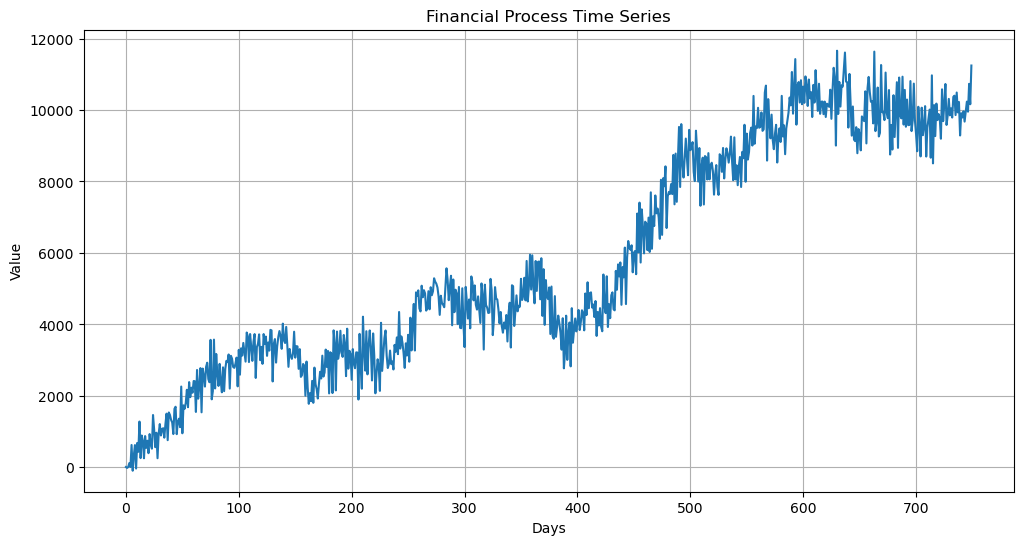

In [21]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['val'])
plt.title('Financial Process Time Series')
plt.xlabel('Days')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Checking rolling mean and std

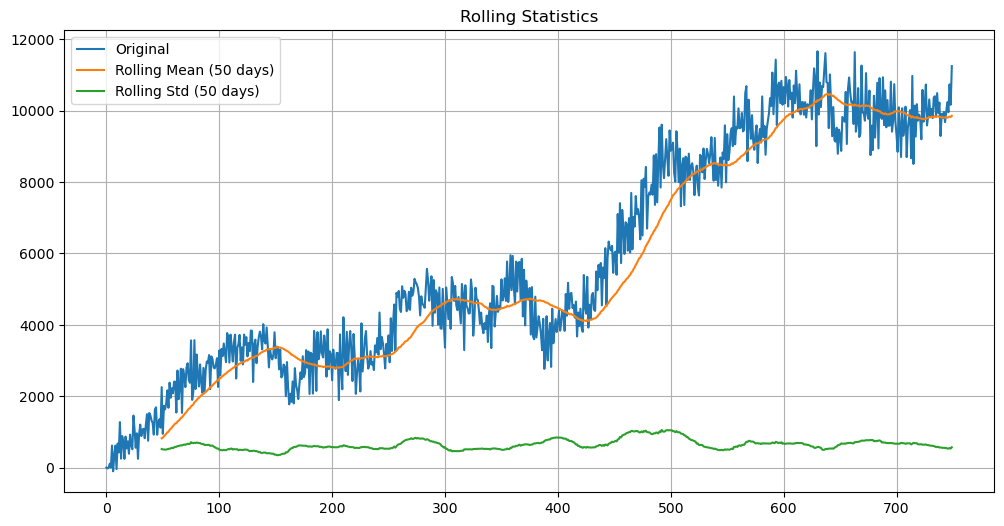

In [222]:
# Check stationarity visually with rolling statistics
rolling_mean = df['val'].rolling(window=50).mean()
rolling_std = df['val'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(df['val'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (50 days)')
plt.plot(rolling_std, label='Rolling Std (50 days)')
plt.legend()
plt.title('Rolling Statistics')
plt.grid(True)
plt.show()


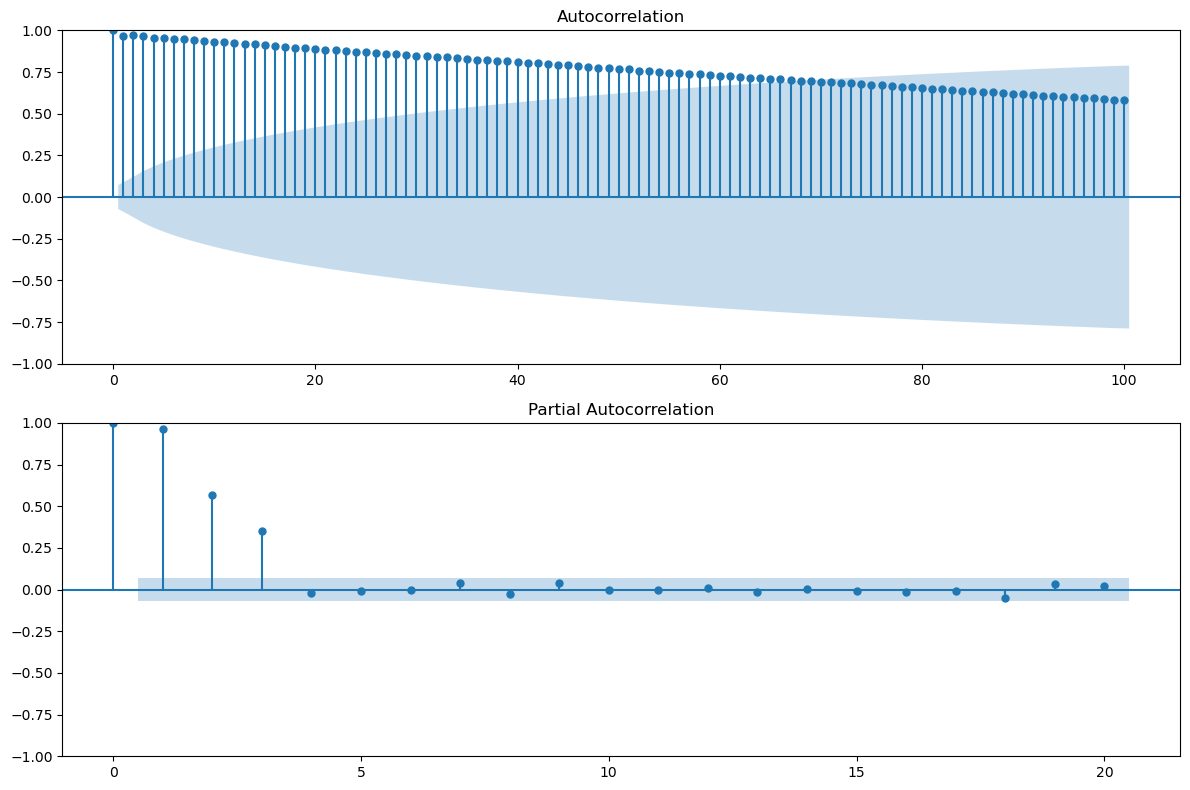

In [224]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['val'], ax=ax1, lags=100)
plot_pacf(df['val'], ax=ax2, lags=20)
plt.tight_layout()
plt.show()

In [243]:
segments[0]

0        11.010294
1       -15.140209
2         8.780830
3       118.976051
4        10.822574
          ...     
182    3184.450036
183    2079.434852
184    3834.318694
185    3465.983384
186    2153.693918
Name: val, Length: 187, dtype: float64

In [28]:
# Check for trend by comparing means in different segments
segment_size = len(df) // 4
segments = [df['val'][i:i+segment_size] for i in range(0, len(df), segment_size)]
segment_means = [segment.mean() for segment in segments]

print("Segment means showing a clear rising trend:")
for i, mean in enumerate(segment_means):
    print(f"Segment {i+1}: {mean:.2f}")


Segment means showing a clear rising trend:
Segment 1: 2301.63
Segment 2: 4146.37
Segment 3: 6630.83
Segment 4: 9984.35
Segment 5: 10702.41


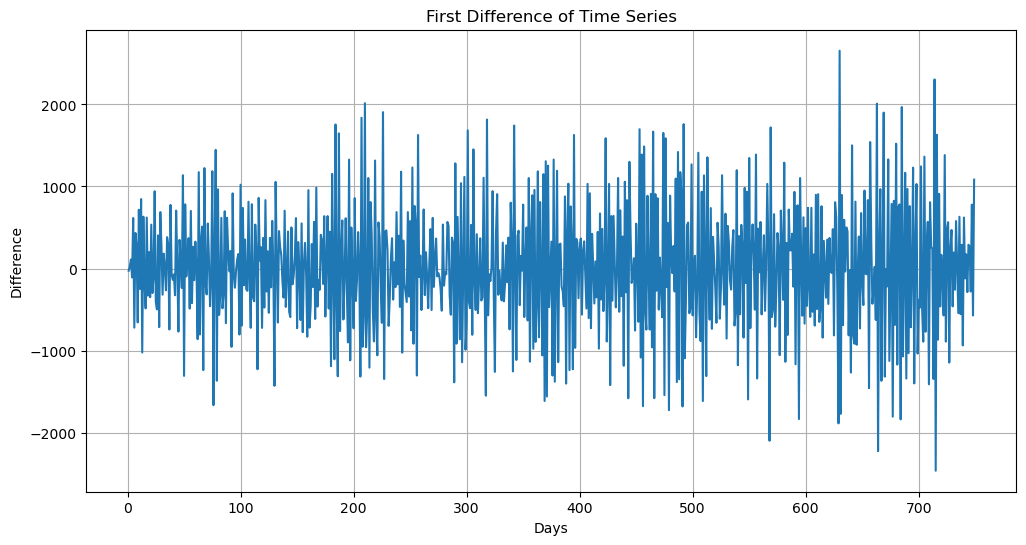

In [30]:
# First differences to check if differencing might make the series stationary
df['diff'] = df['val'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['diff'].dropna())
plt.title('First Difference of Time Series')
plt.xlabel('Days')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

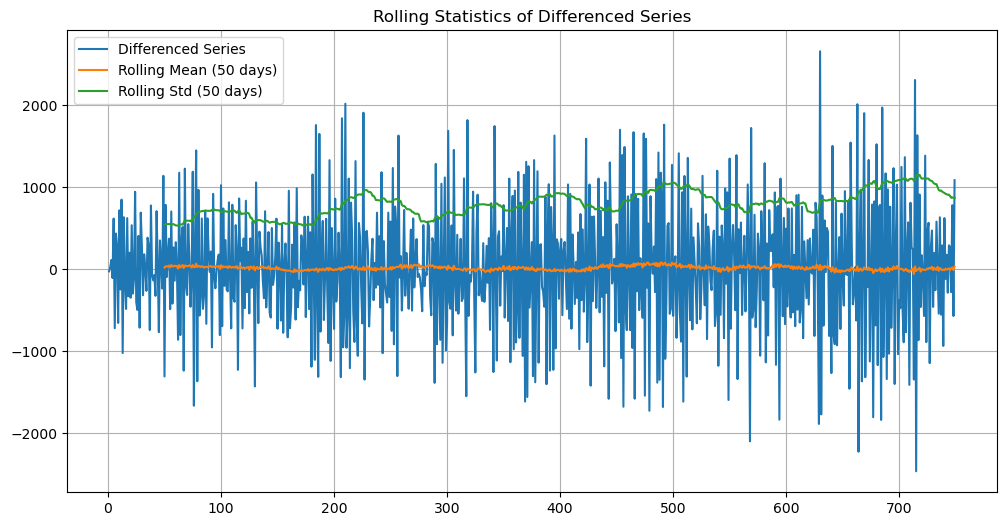

In [32]:
# Rolling statistics for differenced series
rolling_mean_diff = df['diff'].rolling(window=50).mean()
rolling_std_diff = df['diff'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(df['diff'].dropna(), label='Differenced Series')
plt.plot(rolling_mean_diff, label='Rolling Mean (50 days)')
plt.plot(rolling_std_diff, label='Rolling Std (50 days)')
plt.legend()
plt.title('Rolling Statistics of Differenced Series')
plt.grid(True)
plt.show()

In [237]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['diff'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -20.518762325918043
p-value: 0.0


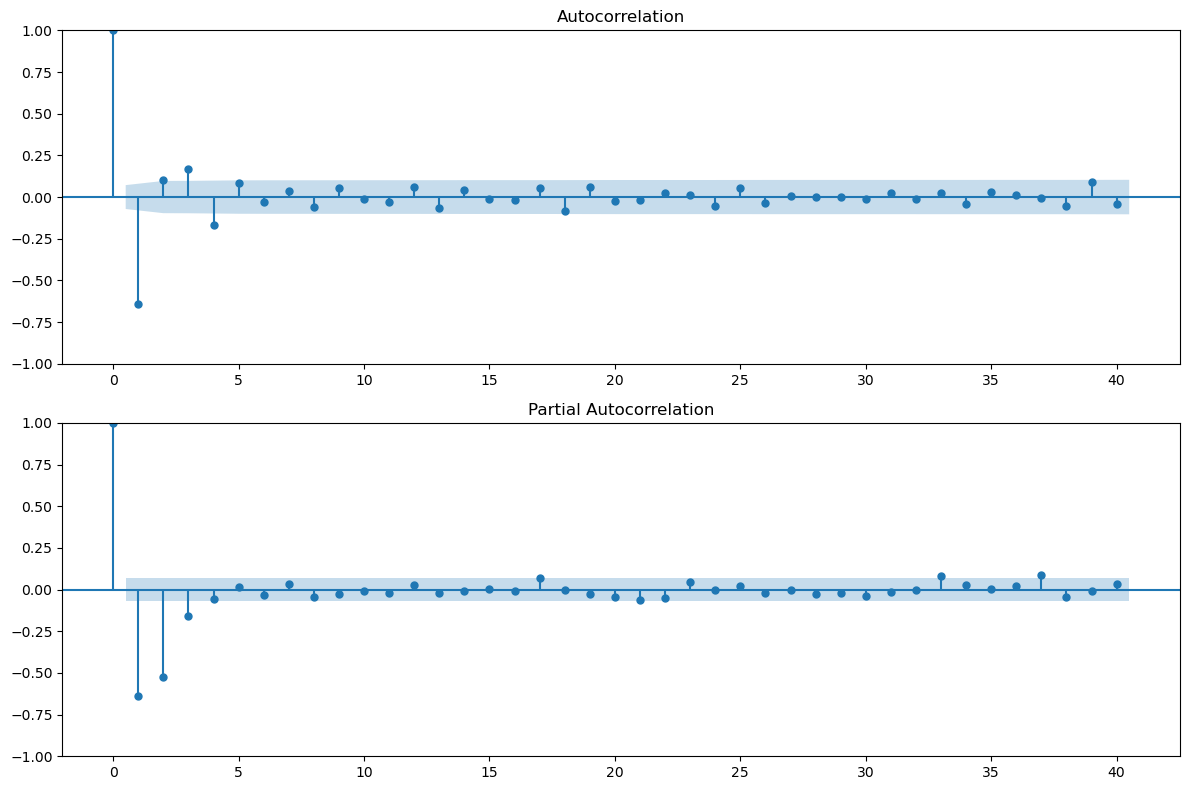

In [239]:
# Plot ACF and PACF of differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['diff'].dropna(), ax=ax1, lags=40)
plot_pacf(df['diff'].dropna(), ax=ax2, lags=40)
plt.tight_layout()
plt.show()

From PACF plot, we see that an ARIMA Model with p = 2 would be approriate for this.
THE ACF plot shows a significant negative spike at lag 1 and the correlation with subsequent lags is much less. This suggests q = 1.
An ARIMA(2,1,2) instead of ARIMA(1,1,2) could capture subtle patterns.

# ARIMA Models

## ARIMA(1,0,0)

### Base Case

In [60]:
def evaluate_arima_model(X, arima_order, test_frac=0.2):
    """
    Evaluate an ARIMA model using train-test split
    """
    # Prepare train and test sets
    train_size = int(len(X) * (1 - test_frac))
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # Make predictions
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # Calculate error metrics
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test, predictions)
    
    return {
        'predictions': predictions,
        'test': test,
        'rmse': rmse,
        'mae': mae,
        'mse': mse
    }


ARIMA(1,0,0) Results:
RMSE: 926.10
MAE: 744.38
MSE: 857669.45


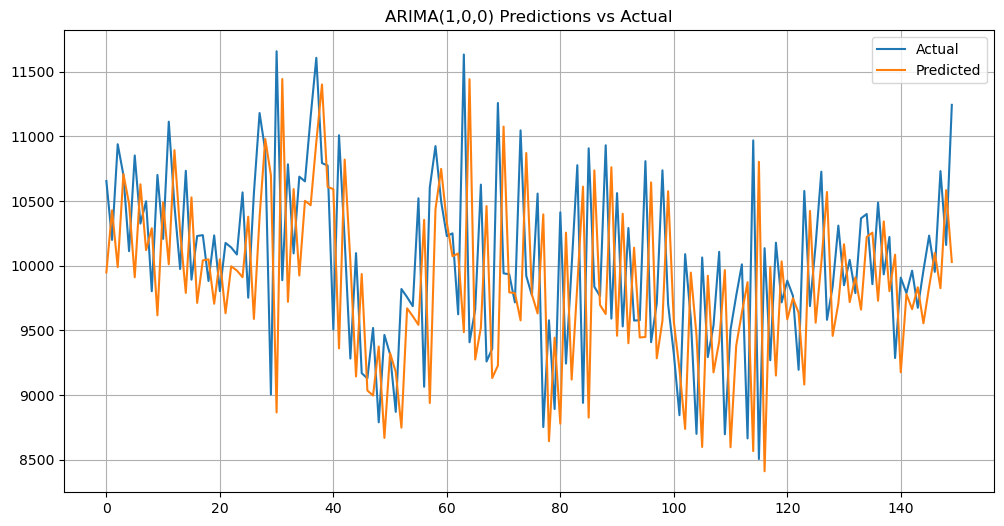

In [62]:
# Evaluate ARIMA(1,0,0)
arima_100_results = evaluate_arima_model(df['val'].values, (1, 0, 0))
print(f"\nARIMA(1,0,0) Results:")
print(f"RMSE: {arima_100_results['rmse']:.2f}")
print(f"MAE: {arima_100_results['mae']:.2f}")
print(f"MSE: {arima_100_results['mse']:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(arima_100_results['test'], label='Actual')
plt.plot(arima_100_results['predictions'], label='Predicted')
plt.title('ARIMA(1,0,0) Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
model = ARIMA(df['val'], order=(1,0,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    val   No. Observations:                  750
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6069.736
Date:                Sun, 02 Mar 2025   AIC                          12145.472
Time:                        21:51:27   BIC                          12159.332
Sample:                             0   HQIC                         12150.813
                                - 750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5778.9593    877.248      6.588      0.000    4059.585    7498.334
ar.L1          0.9708      0.009    111.282      0.000       0.954       0.988
sigma2      6.224e+05   3.34e+04     18.645      0.0

### Lagged Case

Since I notice that the result for ARIMA(1,0,0) if lagged by a day retraces the actuals exceedingly well. I try this model here.

In [68]:
def evaluate_arima_model_lag(X, arima_order, test_frac=0.2):
    """
    Evaluate an ARIMA model using train-test split
    """
    # Prepare train and test sets
    train_size = int(len(X) * (1 - test_frac))
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # Make predictions
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # Calculate error metrics
    mse = mean_squared_error(test[:-1], predictions[1:])
    rmse = sqrt(mse)
    mae = mean_absolute_error(test[:-1], predictions[1:])

    test = test[:-1]
    predictions = predictions[1:]
    return {
        'predictions': predictions,
        'test': test,
        'rmse': rmse,
        'mae': mae,
        'mse': mse
    }


ARIMA(1,0,0) Results:
RMSE: 156.39
MAE: 153.41
MSE: 24458.11


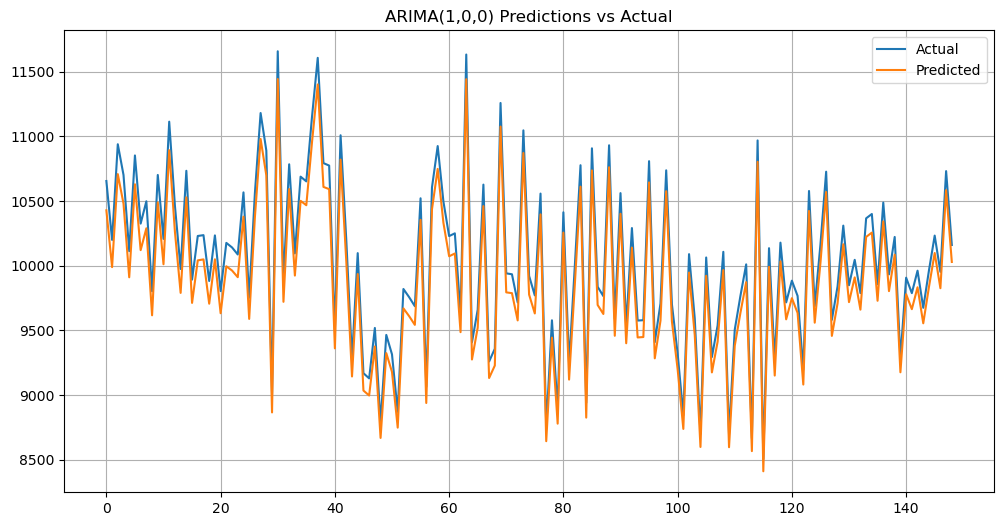

In [70]:
# Evaluate ARIMA(1,0,0)
arima_100_results_lag = evaluate_arima_model_lag(df['val'].values, (1, 0, 0))
print(f"\nARIMA(1,0,0) Results:")
print(f"RMSE: {arima_100_results_lag['rmse']:.2f}")
print(f"MAE: {arima_100_results_lag['mae']:.2f}")
print(f"MSE: {arima_100_results_lag['mse']:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(arima_100_results_lag['test'], label='Actual')
plt.plot(arima_100_results_lag['predictions'], label='Predicted')
plt.title('ARIMA(1,0,0) Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

### Base and Lagged Model Comparison

In [72]:
# Detailed comparison of standard vs. lagged ARIMA(1,0,0) models
print("\n=== Comparing Standard vs. Lagged ARIMA(1,0,0) Models ===")

# Extract data from both models
standard_test = arima_100_results['test']
standard_pred = arima_100_results['predictions']
lagged_test = arima_100_results_lag['test']
lagged_pred = arima_100_results_lag['predictions']

# Calculate performance metrics
print("\nStandard ARIMA(1,0,0) Performance Metrics:")
print(f"RMSE: {arima_100_results['rmse']:.2f}")
print(f"MAE: {arima_100_results['mae']:.2f}")
print(f"MSE: {arima_100_results['mse']:.2f}")

print("\nLagged ARIMA(1,0,0) Performance Metrics:")
print(f"RMSE: {arima_100_results_lag['rmse']:.2f}")
print(f"MAE: {arima_100_results_lag['mae']:.2f}")
print(f"MSE: {arima_100_results_lag['mse']:.2f}")



=== Comparing Standard vs. Lagged ARIMA(1,0,0) Models ===

Standard ARIMA(1,0,0) Performance Metrics:
RMSE: 926.10
MAE: 744.38
MSE: 857669.45

Lagged ARIMA(1,0,0) Performance Metrics:
RMSE: 156.39
MAE: 153.41
MSE: 24458.11


In [74]:
# Calculate improvement percentages
rmse_improvement = ((arima_100_results['rmse'] - arima_100_results_lag['rmse']) / arima_100_results['rmse']) * 100
print(f"\nImprovement with lag adjustment: {rmse_improvement:.2f}% reduction in RMSE")

# Analyze lag-1 correlations
# For standard model
standard_lag1_corr = np.corrcoef(standard_test[:-1], standard_pred[1:])[0, 1]
print(f"\nStandard model: Correlation between actual(t) and prediction(t+1): {standard_lag1_corr:.4f}")

# For lagged model - directly comparing aligned predictions with actuals
lagged_direct_corr = np.corrcoef(lagged_test, lagged_pred)[0, 1] 
print(f"Lagged model: Direct correlation between aligned actual and predicted: {lagged_direct_corr:.4f}")

# Baseline comparison - how well does yesterday predict today?
actual_lag1_corr = np.corrcoef(standard_test[:-1], standard_test[1:])[0, 1]
print(f"Lag-1 autocorrelation in actual data: {actual_lag1_corr:.4f}")


Improvement with lag adjustment: 83.11% reduction in RMSE

Standard model: Correlation between actual(t) and prediction(t+1): 0.9996
Lagged model: Direct correlation between aligned actual and predicted: 0.9996
Lag-1 autocorrelation in actual data: -0.0123


Naive model (tomorrow = today) RMSE: 926.90
Standard ARIMA(1,0,0) improvement over naive model: 0.09%
Lagged ARIMA(1,0,0) improvement over naive model: 83.13%


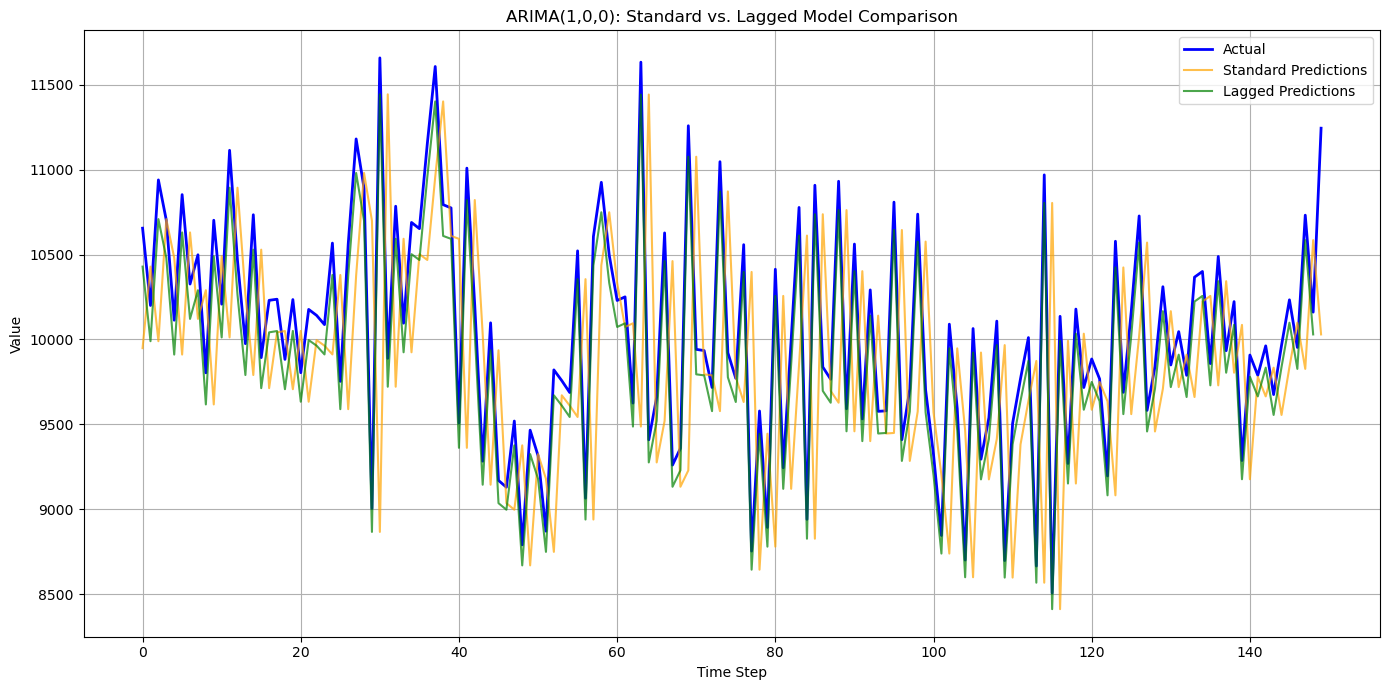

In [76]:
# Calculate naive model performance (tomorrow = today)
naive_predictions = standard_test[:-1]  # Yesterday's value
naive_targets = standard_test[1:]       # Today's value
naive_rmse = np.sqrt(mean_squared_error(naive_targets, naive_predictions))
print(f"Naive model (tomorrow = today) RMSE: {naive_rmse:.2f}")

# Calculate skill scores relative to naive model
standard_skill = (1 - arima_100_results['rmse'] / naive_rmse) * 100
lagged_skill = (1 - arima_100_results_lag['rmse'] / naive_rmse) * 100
print(f"Standard ARIMA(1,0,0) improvement over naive model: {standard_skill:.2f}%")
print(f"Lagged ARIMA(1,0,0) improvement over naive model: {lagged_skill:.2f}%")

# Visual comparison of predictions
plt.figure(figsize=(14, 7))
plt.plot(standard_test, label='Actual', color='blue', linewidth=2)
plt.plot(standard_pred, label='Standard Predictions', color='orange', alpha=0.7)
plt.plot(lagged_pred, label='Lagged Predictions', color='green', alpha=0.7)



# Add a title and legend
plt.title('ARIMA(1,0,0): Standard vs. Lagged Model Comparison')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


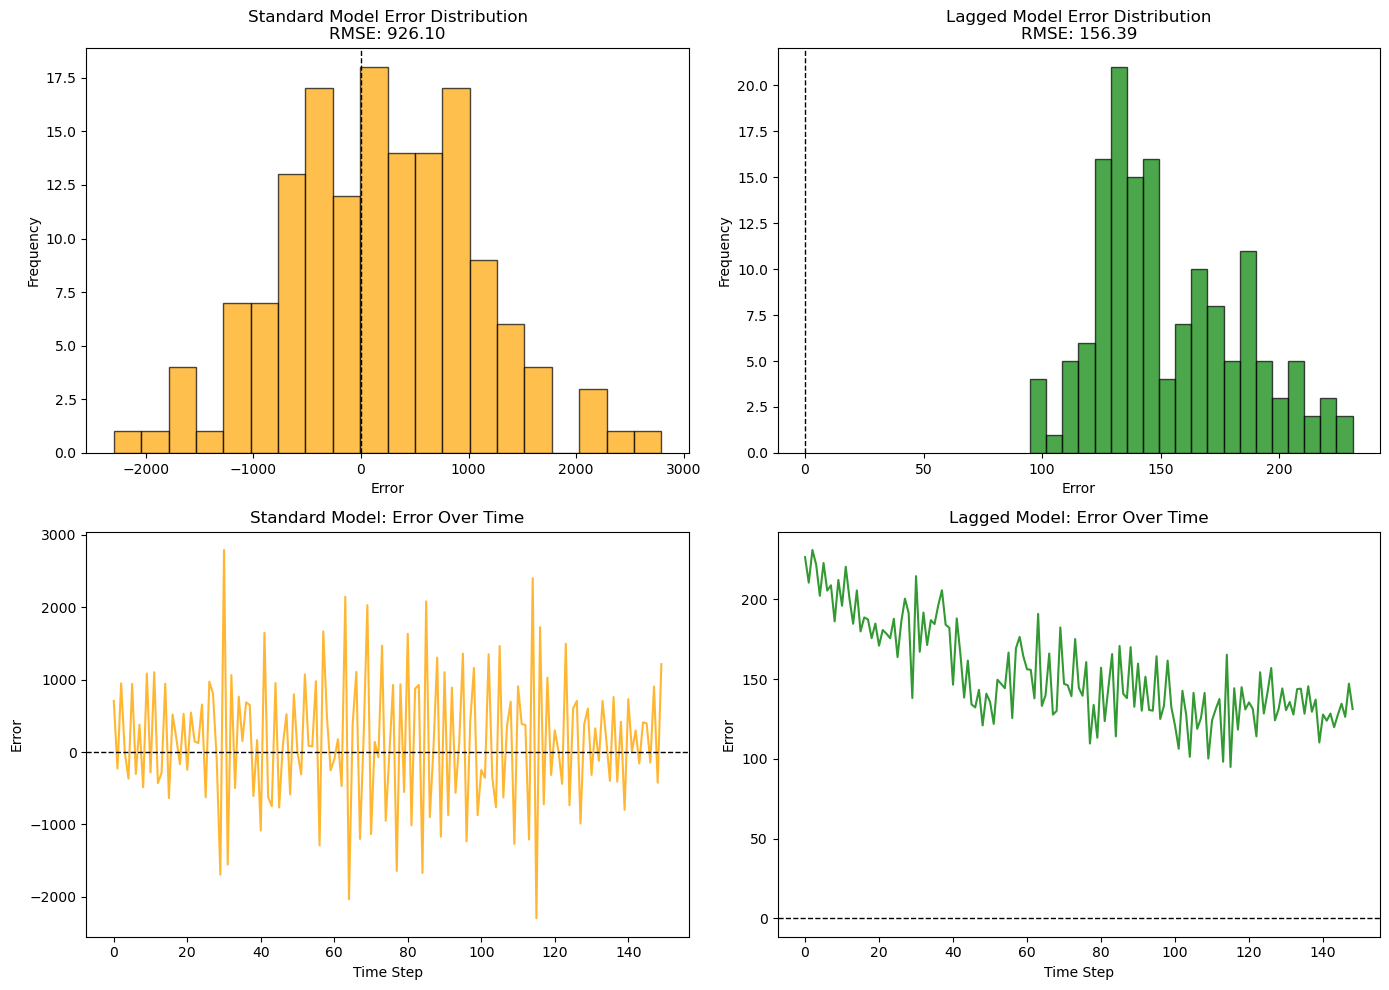

In [78]:

# Compare error distributions and patterns
standard_errors = standard_test - standard_pred
lagged_errors = lagged_test - lagged_pred

plt.figure(figsize=(14, 10))

# Error distributions
plt.subplot(2, 2, 1)
plt.hist(standard_errors, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.title(f'Standard Model Error Distribution\nRMSE: {arima_100_results["rmse"]:.2f}')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(lagged_errors, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.title(f'Lagged Model Error Distribution\nRMSE: {arima_100_results_lag["rmse"]:.2f}')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Error over time
plt.subplot(2, 2, 3)
plt.plot(standard_errors, color='orange', alpha=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Standard Model: Error Over Time')
plt.xlabel('Time Step')
plt.ylabel('Error')

plt.subplot(2, 2, 4)
plt.plot(lagged_errors, color='green', alpha=0.8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Lagged Model: Error Over Time')
plt.xlabel('Time Step')
plt.ylabel('Error')

plt.tight_layout()
plt.show()

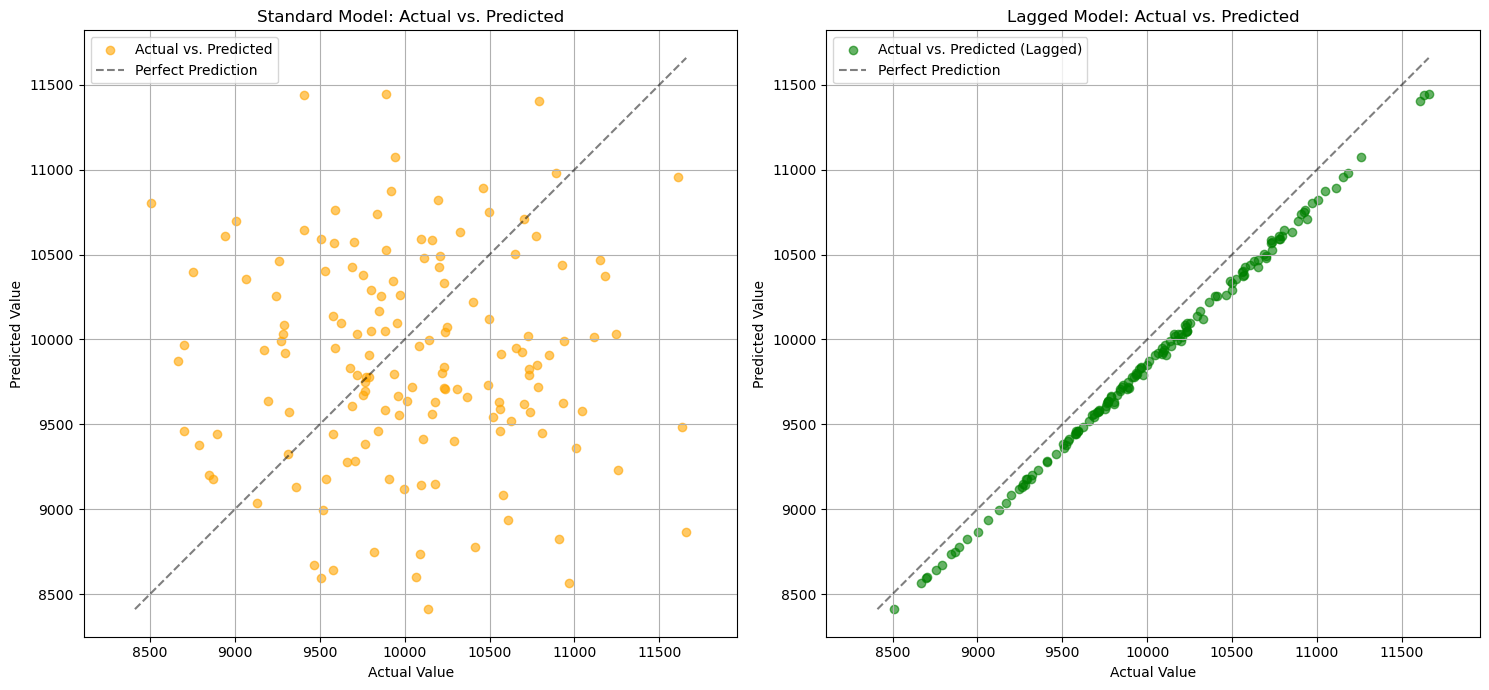

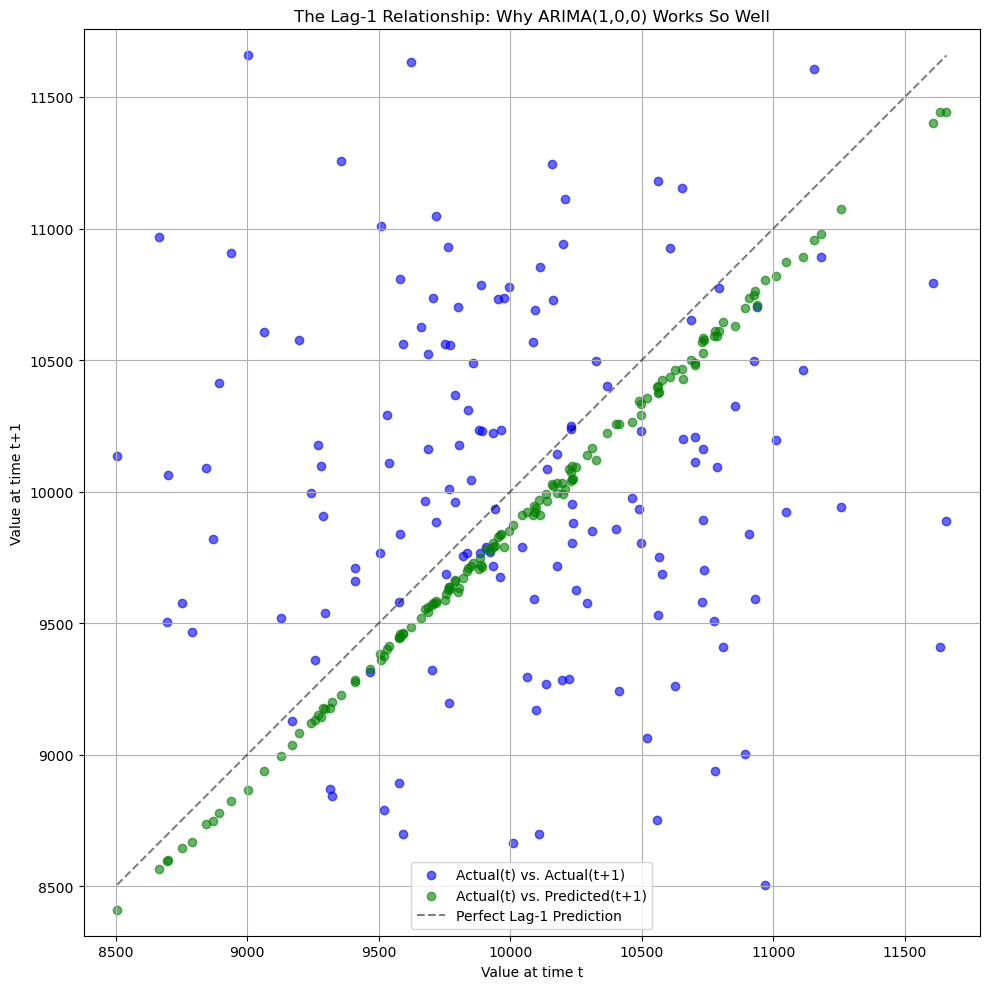

In [80]:
# Create scatter plots to show why the lag adjustment works so well
plt.figure(figsize=(15, 7))

# Standard model scatter
plt.subplot(1, 2, 1)
plt.scatter(standard_test, standard_pred, alpha=0.6, color='orange', label='Actual vs. Predicted')
min_val = min(min(standard_test), min(standard_pred))
max_val = max(max(standard_test), max(standard_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Prediction')
plt.title('Standard Model: Actual vs. Predicted')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Lagged model scatter
plt.subplot(1, 2, 2)
plt.scatter(lagged_test, lagged_pred, alpha=0.6, color='green', label='Actual vs. Predicted (Lagged)')
min_val = min(min(lagged_test), min(lagged_pred))
max_val = max(max(lagged_test), max(lagged_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect Prediction')
plt.title('Lagged Model: Actual vs. Predicted')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

# Visualize the lag-1 relationship that makes the lagged model so effective
plt.figure(figsize=(10, 10))
plt.scatter(standard_test[:-1], standard_test[1:], alpha=0.6, color='blue', 
           label='Actual(t) vs. Actual(t+1)')
plt.scatter(standard_test[:-1], standard_pred[1:], alpha=0.6, color='green',
           label='Actual(t) vs. Predicted(t+1)')

# Add the AR(1) model line to show the relationship
# This line approximates what the ARIMA(1,0,0) model is learning
min_val = min(standard_test)
max_val = max(standard_test)
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, 
         label='Perfect Lag-1 Prediction')

plt.title('The Lag-1 Relationship: Why ARIMA(1,0,0) Works So Well')
plt.xlabel('Value at time t')
plt.ylabel('Value at time t+1')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Bias Correction

Lagged model shows a strong bias. Let's try to correct that.

In [159]:
# Implement bias correction for the ARIMA(1,0,0) lagged model
print("\n=== Adding Bias Correction to ARIMA(1,0,0) Lagged Model ===")

# Calculate the mean error (bias) from the lagged model
lagged_errors = lagged_test - lagged_pred
mean_bias = np.mean(lagged_errors)
print(f"Mean error (bias) in ARIMA(1,0,0) lagged model: {mean_bias:.2f}")


=== Adding Bias Correction to ARIMA(1,0,0) Lagged Model ===
Mean error (bias) in ARIMA(1,0,0) lagged model: 153.41


In [161]:
# Create bias-corrected predictions
bias_corrected_predictions = [pred + mean_bias for pred in lagged_pred]

# Calculate error metrics for the bias-corrected predictions
corrected_mse = mean_squared_error(lagged_test, bias_corrected_predictions)
corrected_rmse = sqrt(corrected_mse)
corrected_mae = mean_absolute_error(lagged_test, bias_corrected_predictions)

# Calculate the improvement percentage
bias_improvement = ((arima_100_results_lag['rmse'] - corrected_rmse) / arima_100_results_lag['rmse']) * 100

print("\nPerformance Comparison After Bias Correction:")
print(f"Original ARIMA(1,0,0) Lagged RMSE: {arima_100_results_lag['rmse']:.2f}")
print(f"Bias-Corrected ARIMA(1,0,0) Lagged RMSE: {corrected_rmse:.2f}")
print(f"Improvement from bias correction: {bias_improvement:.2f}%")

# Create combined performance comparison
print("\nOverall Model Comparison:")
print(f"Standard ARIMA(1,0,0) RMSE: {arima_100_results['rmse']:.2f}")
print(f"ARIMA(1,0,0) Lagged RMSE: {arima_100_results_lag['rmse']:.2f}")
print(f"Bias-Corrected ARIMA(1,0,0) Lagged RMSE: {corrected_rmse:.2f}")


Performance Comparison After Bias Correction:
Original ARIMA(1,0,0) Lagged RMSE: 156.39
Bias-Corrected ARIMA(1,0,0) Lagged RMSE: 30.37
Improvement from bias correction: 80.58%

Overall Model Comparison:
Standard ARIMA(1,0,0) RMSE: 926.10
ARIMA(1,0,0) Lagged RMSE: 156.39
Bias-Corrected ARIMA(1,0,0) Lagged RMSE: 30.37


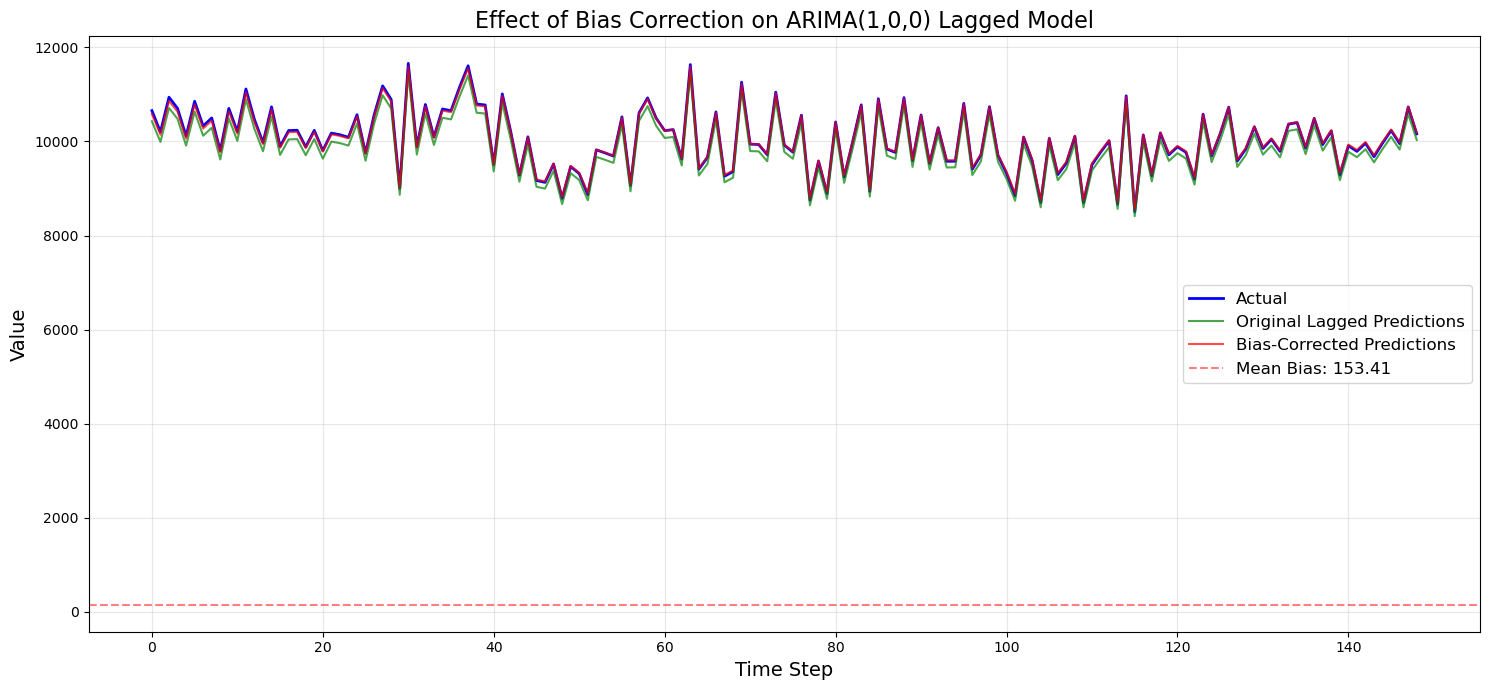

In [163]:
# Visualize the impact of bias correction
plt.figure(figsize=(15, 7))
plt.plot(lagged_test, label='Actual', linewidth=2, color='blue')
plt.plot(lagged_pred, label='Original Lagged Predictions', alpha=0.7, color='green')
plt.plot(bias_corrected_predictions, label='Bias-Corrected Predictions', alpha=0.7, color='red')

# Highlight the bias correction with a horizontal line
plt.axhline(y=mean_bias, color='red', linestyle='--', alpha=0.5, 
            label=f'Mean Bias: {mean_bias:.2f}')

plt.title('Effect of Bias Correction on ARIMA(1,0,0) Lagged Model', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

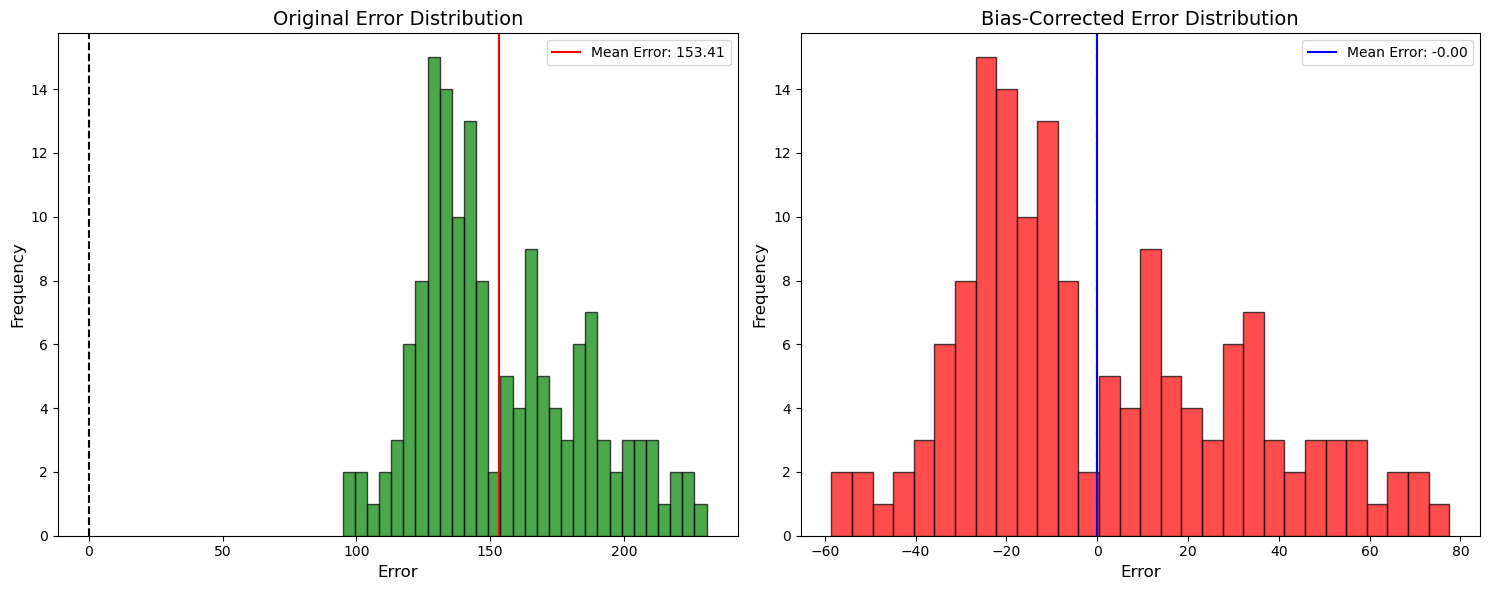

In [165]:
# Compare the error distributions before and after correction
plt.figure(figsize=(15, 6))

# Original error distribution
plt.subplot(1, 2, 1)
plt.hist(lagged_errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--')
plt.axvline(x=mean_bias, color='red', linestyle='-', 
            label=f'Mean Error: {mean_bias:.2f}')
plt.title('Original Error Distribution', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)

# Corrected error distribution
plt.subplot(1, 2, 2)
corrected_errors = lagged_test - bias_corrected_predictions
plt.hist(corrected_errors, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--')
plt.axvline(x=np.mean(corrected_errors), color='blue', linestyle='-', 
            label=f'Mean Error: {np.mean(corrected_errors):.2f}')
plt.title('Bias-Corrected Error Distribution', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [167]:
# First, create the bias-corrected model results
# Calculate the mean error (bias) from the lagged model
lagged_errors = arima_100_results_lag['test'] - arima_100_results_lag['predictions']
mean_bias = np.mean(lagged_errors)

# Create bias-corrected predictions
bias_corrected_predictions = arima_100_results_lag['predictions'] + mean_bias

# Calculate error metrics for the bias-corrected predictions
corrected_mse = mean_squared_error(arima_100_results_lag['test'], bias_corrected_predictions)
corrected_rmse = sqrt(corrected_mse)
corrected_mae = mean_absolute_error(arima_100_results_lag['test'], bias_corrected_predictions)

# Create the results dictionary for the bias-corrected model
arima_100_results_lag_bias = {
    'test': arima_100_results_lag['test'],
    'predictions': bias_corrected_predictions,
    'rmse': corrected_rmse,
    'mae': corrected_mae,
    'mse': corrected_mse
}


## ARIMA(2,1,2)


ARIMA(2,1,2) Results:
RMSE: 585.73
MAE: 465.12
MSE: 343083.42


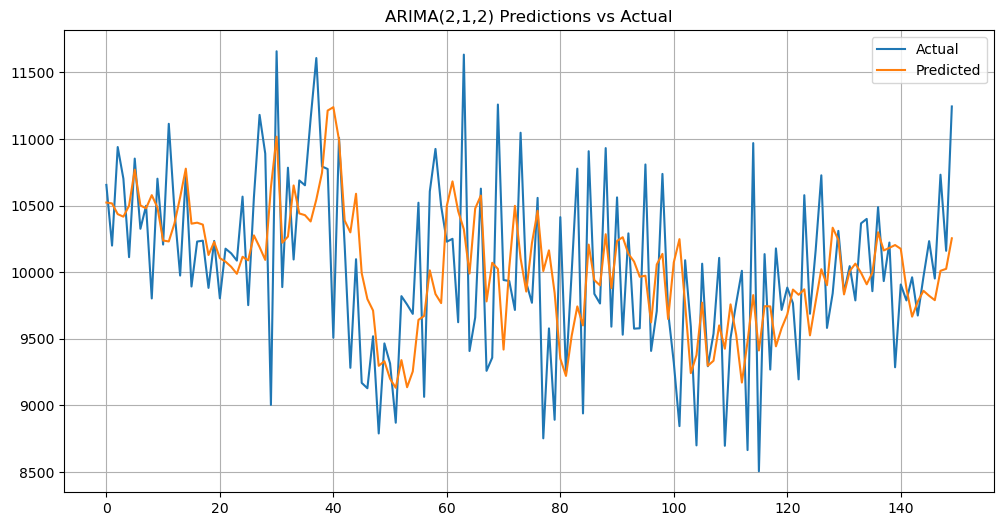

In [82]:
arima_212_results = evaluate_arima_model(df['val'].values, (2, 1, 2))
print(f"\nARIMA(2,1,2) Results:")
print(f"RMSE: {arima_212_results['rmse']:.2f}")
print(f"MAE: {arima_212_results['mae']:.2f}")
print(f"MSE: {arima_212_results['mse']:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(arima_212_results['test'], label='Actual')
plt.plot(arima_212_results['predictions'], label='Predicted')
plt.title('ARIMA(2,1,2) Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
model = ARIMA(df['val'], order=(2,1,2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    val   No. Observations:                  750
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5736.455
Date:                Sun, 02 Mar 2025   AIC                          11482.909
Time:                        21:52:51   BIC                          11506.003
Sample:                             0   HQIC                         11491.808
                                - 750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7329      0.126     -5.822      0.000      -0.980      -0.486
ar.L2         -0.3759      0.059     -6.337      0.000      -0.492      -0.260
ma.L1         -0.3372      0.131     -2.578      0.0

# Best ARIMA Model

In [227]:
pip install pmdarima

python(21513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [231]:
import pmdarima as pm

In [233]:
model = pm.auto_arima(
    df['val'],           
    start_p=0, start_q=0,
    max_p=5,    max_q=5, # Search up to AR=5, MA=5
    d=None,              
    seasonal=False,      
    trace=True,          
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True        
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12134.214, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11738.672, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11610.046, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12132.481, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11521.583, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11478.087, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11498.385, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11479.835, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11479.298, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11495.934, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11479.967, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11478.173, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11480.953, Time=0.01 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 0.854 seconds
         

# OLS Regression

In [96]:
#We'll use lagged values as predictors in the regression model.
def create_features(data, lag=5): #Choosing 5 features
    """Create features using lagged values"""
    df = pd.DataFrame(data)
    df.columns = ['y']
    
    # Create lagged features
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['y'].shift(i)
    
    # Drop rows with NaN values
    df = df.dropna()
    
    return df


In [112]:
def evaluate_ols_model(X, test_size=0.2, lag=5):
    """Evaluate OLS regression model"""
    # Create features
    data = create_features(X, lag)
    
    # Prepare train and test sets
    train_size = int(len(data) * (1 - test_size))
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]
    
    # Prepare X and y
    X_train = train.drop('y', axis=1)
    y_train = train['y']
    X_test = test.drop('y', axis=1)
    y_test = test['y']
    
    # Fit model
    model = sm.OLS(y_train, sm.add_constant(X_train))
    results = model.fit()
    print(results.summary())
    
    # Make predictions
    predictions = results.predict(sm.add_constant(X_test))
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    
    return {
        'predictions': predictions,
        'test': y_test,
        'rmse': rmse,
        'mae': mae,
        'mse': mse,
        'model': results
    }

In [114]:
# Evaluate OLS model
ols_results = evaluate_ols_model(df['val'].values, lag=5)
print(f"\nOLS Regression Results:")
print(f"RMSE: {ols_results['rmse']:.2f}")
print(f"MAE: {ols_results['mae']:.2f}")
print(f"MSE: {ols_results['mse']:.2f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     3093.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:58:07   Log-Likelihood:                -4539.2
No. Observations:                 596   AIC:                             9090.
Df Residuals:                     590   BIC:                             9117.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.6370     43.010      1.433      0.1

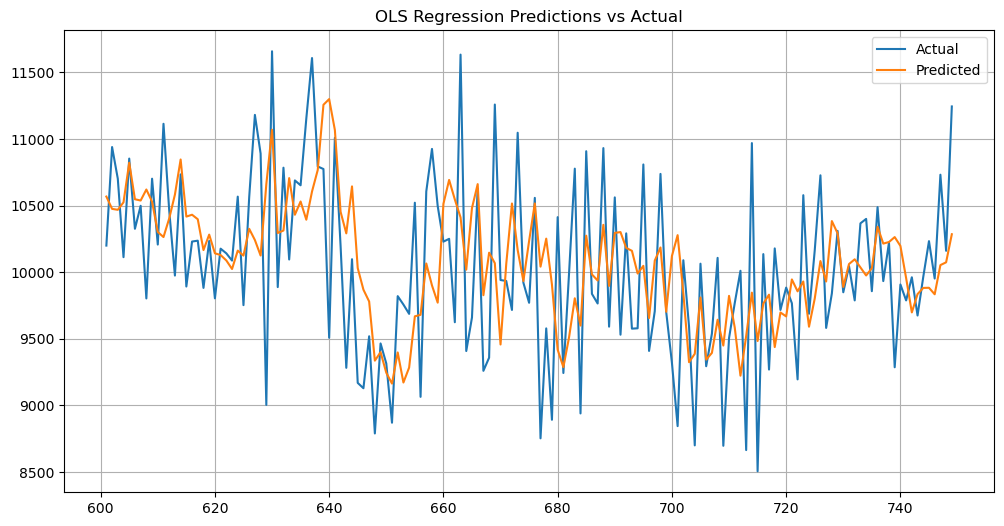

In [116]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ols_results['test'], label='Actual')
plt.plot(ols_results['predictions'], label='Predicted')
plt.title('OLS Regression Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# LSTM

## Data Prep

In [235]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [120]:
# Prepare financial time series data for LSTM model
# Create a copy of the original data to avoid modifications
lstm_df = df.copy()
lstm_df['time_index'] = lstm_df.index  # Add time index for reference

In [122]:
# Extract the target values for scaling
series_values = lstm_df['val'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series_values)

# Split into training and testing sets (80/20 split to match previous models)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 600
Testing data size: 150


In [126]:
# Define a shorter sequence length (lookback period)
n_past = 30  # Reduced from 60 to 5 days to decrease computation time

# Prepare sequences for LSTM training set
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare sequences for LSTM test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape input data for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(f"LSTM input shape: {X_train.shape}")
print(f"LSTM output shape: {y_train.shape}")

LSTM input shape: (570, 30, 1)
LSTM output shape: (570,)


In [128]:
'''
# Define the sequence length (lookback period)
n_past = 20  # Using 60 days of historical data to predict the next value

# Prepare sequences for LSTM training set
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare sequences for LSTM test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape input data for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"LSTM input shape: {X_train.shape}")
print(f"LSTM output shape: {y_train.shape}")
'''

'\n# Define the sequence length (lookback period)\nn_past = 20  # Using 60 days of historical data to predict the next value\n\n# Prepare sequences for LSTM training set\nX_train, y_train = [], []\nfor i in range(n_past, len(train_data)):\n    X_train.append(train_data[i - n_past:i, 0])\n    y_train.append(train_data[i, 0])\nX_train, y_train = np.array(X_train), np.array(y_train)\n\n# Prepare sequences for LSTM test set\nX_test, y_test = [], []\nfor i in range(n_past, len(test_data)):\n    X_test.append(test_data[i - n_past:i, 0])\n    y_test.append(test_data[i, 0])\nX_test, y_test = np.array(X_test), np.array(y_test)\n\n# Reshape input data for LSTM [samples, time steps, features]\nX_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)\nX_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)\n\nprint(f"LSTM input shape: {X_train.shape}")\nprint(f"LSTM output shape: {y_train.shape}")\n'

## LSTM Training

In [141]:
# Simplified model architecture with just one LSTM layer
model = Sequential([
    # Single LSTM layer with fewer units
    LSTM(units=20, input_shape=(n_past, 1)),#Changing to SImple RNN for run time efficiency
    Dropout(0.1),  # Reduced dropout
    
    # Output layer
    Dense(units=1)
])

# Print model summary
model.summary()

# Compile model with MSE loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Define model callbacks with reduced patience
checkpoints = ModelCheckpoint(
    filepath='lstm_weights.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Reduced from 15 to 5
    restore_best_weights=True,
    verbose=1
)

# Train the LSTM model with fewer epochs and larger batch size
print("\nTraining LSTM model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Reduced from 100 to 10
    batch_size=32,  # Increased from 32 to 64
    verbose=1,
    callbacks=[checkpoints, early_stopping]
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 20)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781 (6.96 KB)

 Trainable params: 1,781 (6.96 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - loss: 0.3232

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2402 - val_loss: 0.4267
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1215

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0768 - val_loss: 0.0362
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 - val_loss: 0.0278
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.0108
Epoch 5/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - val_loss: 0.0035
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0053
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0073
Epoch 16/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - va

In [143]:
'''
model = Sequential([
    # First LSTM layer with return sequences for stacking LSTM layers
    LSTM(units=50, return_sequences=True, input_shape=(n_past, 1)),
    Dropout(0.2),  # Prevent overfitting
    
    # Second LSTM layer
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    
    # Third LSTM layer (no return sequences needed for final LSTM layer)
    LSTM(units=50),
    Dropout(0.2),
    
    # Output layer
    Dense(units=1)
])

# Print model summary
model.summary()

# Compile model with MSE loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Define model callbacks for better training
checkpoints = ModelCheckpoint(
    filepath='lstm_weights.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Stop if no improvement after 15 epochs
    restore_best_weights=True,
    verbose=1
)

# Train the LSTM model
print("\nTraining LSTM model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoints, early_stopping]
)
'''

'\nmodel = Sequential([\n    # First LSTM layer with return sequences for stacking LSTM layers\n    LSTM(units=50, return_sequences=True, input_shape=(n_past, 1)),\n    Dropout(0.2),  # Prevent overfitting\n    \n    # Second LSTM layer\n    LSTM(units=50, return_sequences=True),\n    Dropout(0.2),\n    \n    # Third LSTM layer (no return sequences needed for final LSTM layer)\n    LSTM(units=50),\n    Dropout(0.2),\n    \n    # Output layer\n    Dense(units=1)\n])\n\n# Print model summary\nmodel.summary()\n\n# Compile model with MSE loss and Adam optimizer\nmodel.compile(loss=\'mean_squared_error\', optimizer=\'adam\')\n\n# Define model callbacks for better training\ncheckpoints = ModelCheckpoint(\n    filepath=\'lstm_weights.h5\',\n    save_best_only=True,\n    monitor=\'val_loss\',\n    mode=\'min\'\n)\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_loss\',\n    patience=15,  # Stop if no improvement after 15 epochs\n    restore_best_weights=True,\n    verbose=1\n)\n\n# Train 

In [145]:
# Generate predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
train_predict_orig = scaler.inverse_transform(train_predict)

y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
test_predict_orig = scaler.inverse_transform(test_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## LSTM Performance

In [147]:
# Calculate performance metrics
train_rmse = sqrt(mean_squared_error(y_train_orig, train_predict_orig))
test_rmse = sqrt(mean_squared_error(y_test_orig, test_predict_orig))
train_mae = mean_absolute_error(y_train_orig, train_predict_orig)
test_mae = mean_absolute_error(y_test_orig, test_predict_orig)

print("\nLSTM Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")


LSTM Model Performance:
Training RMSE: 660.00
Testing RMSE: 691.49
Training MAE: 528.57
Testing MAE: 551.82


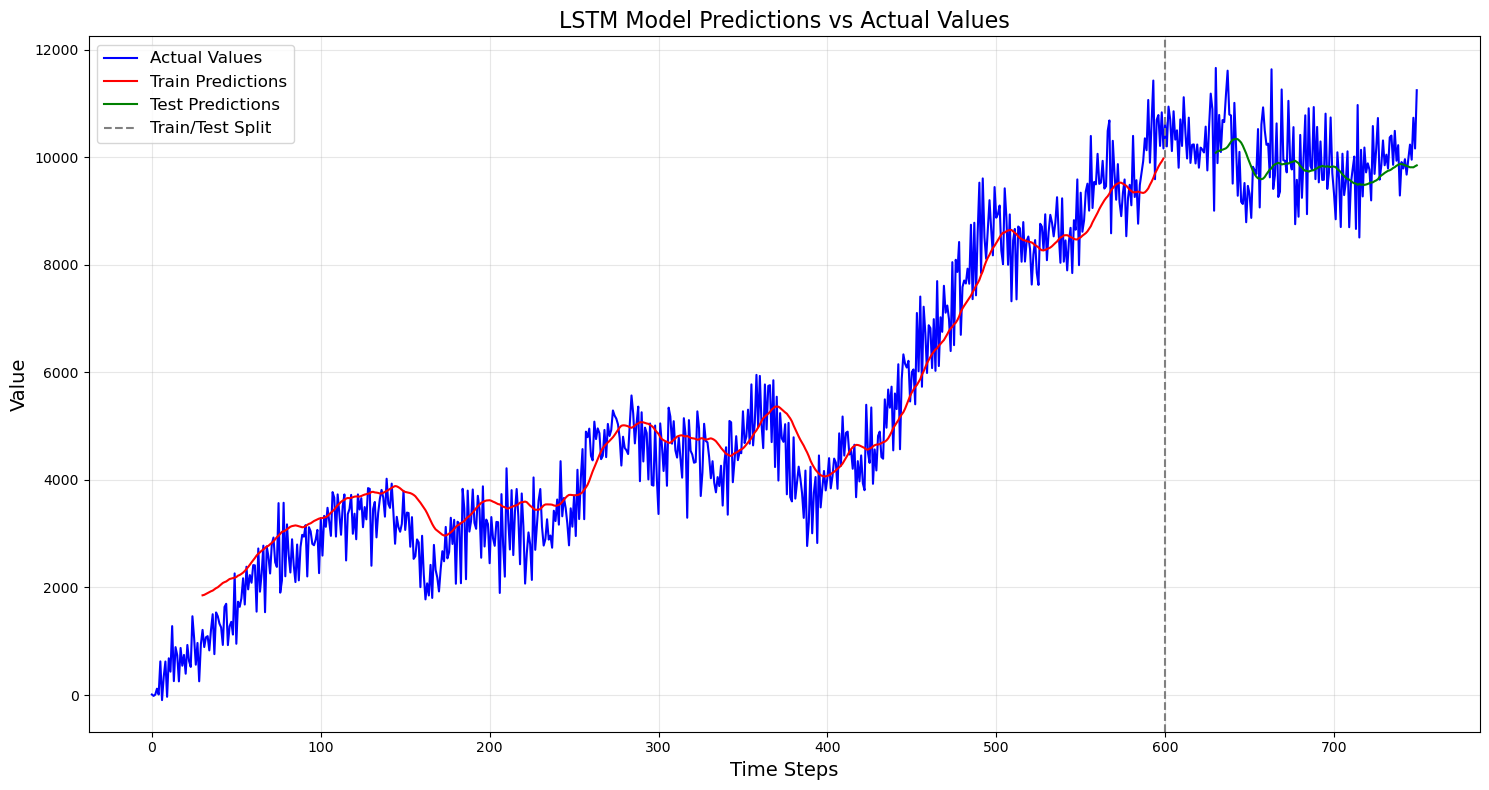

In [149]:
# Create properly aligned arrays for visualization
# Set up arrays to plot predictions in the correct positions
full_series = np.empty_like(series_values)
full_series[:] = np.nan

# Training predictions (shifted by n_past to align with the original series)
train_plot = np.empty_like(series_values)
train_plot[:] = np.nan
train_plot[n_past:n_past+len(train_predict), :] = train_predict_orig

# Test predictions
test_plot = np.empty_like(series_values)
test_plot[:] = np.nan
test_start = len(train_data) + n_past
test_plot[test_start:test_start+len(test_predict), :] = test_predict_orig

# Transform original data back to its original scale
original_values = scaler.inverse_transform(scaled_data)

# Visualize the results
plt.figure(figsize=(15, 8))
plt.plot(original_values, color='blue', label='Actual Values')
plt.plot(train_plot, color='red', label='Train Predictions')
plt.plot(test_plot, color='green', label='Test Predictions')



# Add vertical line to separate train and test data
plt.axvline(x=train_size, color='gray', linestyle='--', label='Train/Test Split')

plt.title('LSTM Model Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The architecture of the LSTM was significantly simplified to ensure a low run time. That affectus the performance as the LSTM as shown in the figure above.

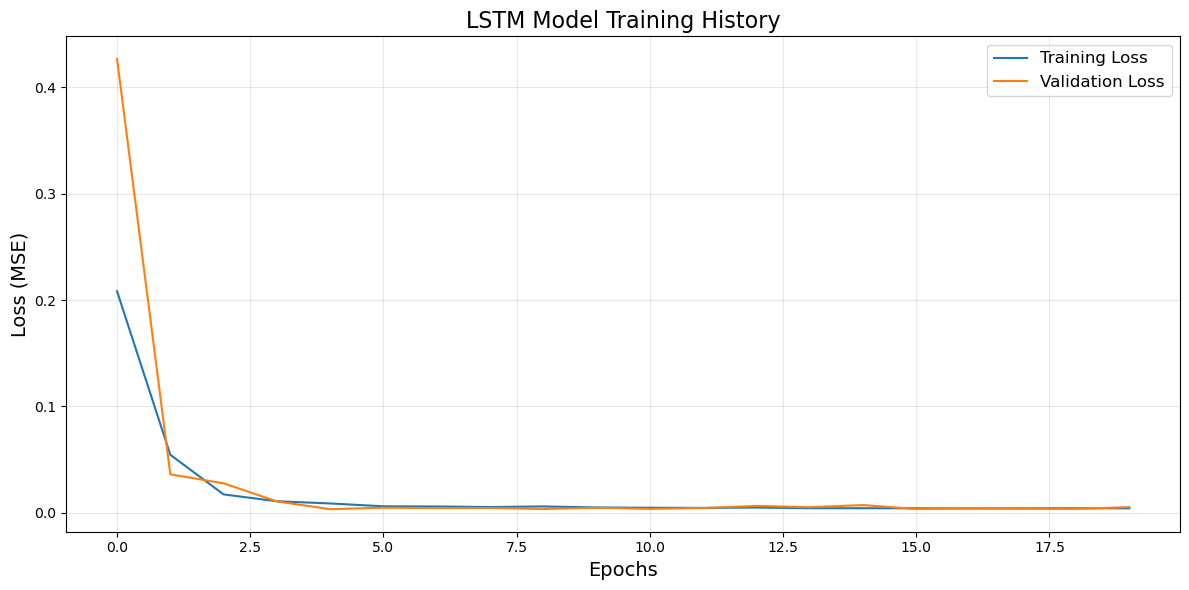

In [152]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training History', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Train_test Split Comparison

In [169]:
# Store results in a dictionary for comparison with other models
lstm_results = {
    'test': y_test_orig.flatten(),  # Actual test values
    'predictions': test_predict_orig.flatten(),  # Predicted test values
    'rmse': test_rmse,
    'mae': test_mae,
    'mse': test_rmse**2
}

In [171]:
# Add all models to the comparison dictionary, including ARIMA(1,0,0) lagged
models = {
    'LSTM': lstm_results['rmse'],
    'ARIMA(1,0,0)': arima_100_results['rmse'],
    'ARIMA(1,0,0) Lagged': arima_100_results_lag['rmse'],  # Added lagged model
    'ARIMA(1,0,0) Lagged and Bias Corrected': arima_100_results_lag_bias['rmse'],
    'ARIMA(2,1,2)': arima_212_results['rmse'],
    'OLS Regression': ols_results['rmse']
}

# Find the best model based on RMSE
best_model = min(models, key=models.get)
print(f"\nBest model based on RMSE: {best_model}")
print(f"RMSE: {models[best_model]:.2f}")


Best model based on RMSE: ARIMA(1,0,0) Lagged and Bias Corrected
RMSE: 30.37


In [173]:
# Generate future forecasts (next 30 steps)
# Use the last n_past values from the dataset
last_sequence = scaled_data[-n_past:].reshape(1, n_past, 1)

# Generate predictions
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(30):  # Predict 30 steps into the future
    next_pred = model.predict(current_sequence)[0]
    future_predictions.append(next_pred[0])
    
    # Update the sequence by removing the first value and adding the prediction
    current_sequence = np.append(current_sequence[:, 1:, :], 
                                [[next_pred]], axis=1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━

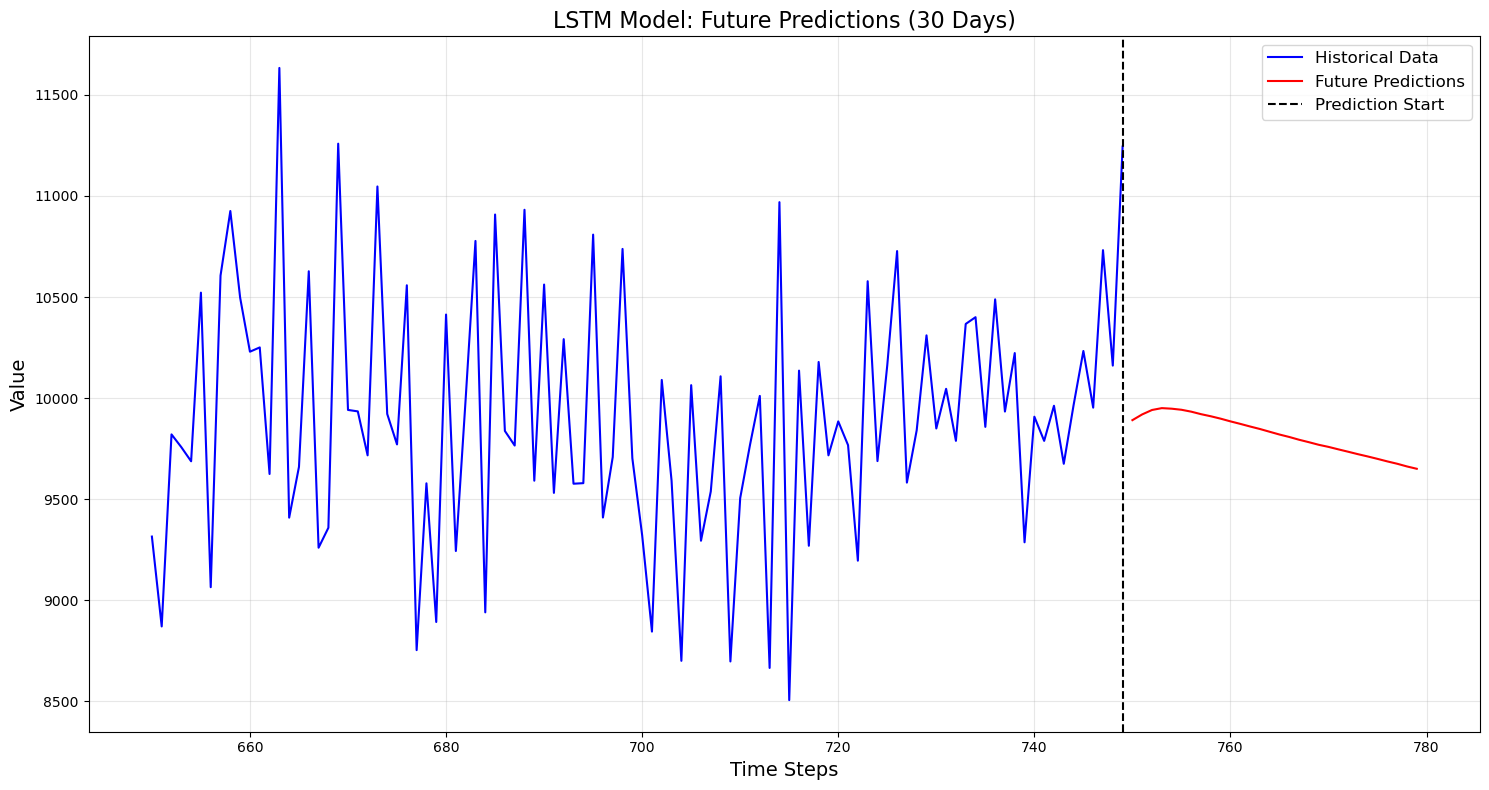

In [175]:
# Plot future predictions
plt.figure(figsize=(15, 8))
# Plot last 100 known values
plt.plot(range(len(original_values)-100, len(original_values)), 
         original_values[-100:], 
         label='Historical Data', color='blue')
         
# Plot future predictions
plt.plot(range(len(original_values), len(original_values) + len(future_predictions)), 
         future_predictions, 
         label='Future Predictions', color='red')
         
plt.axvline(x=len(original_values)-1, color='black', linestyle='--', 
           label='Prediction Start')

plt.title('LSTM Model: Future Predictions (30 Days)', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

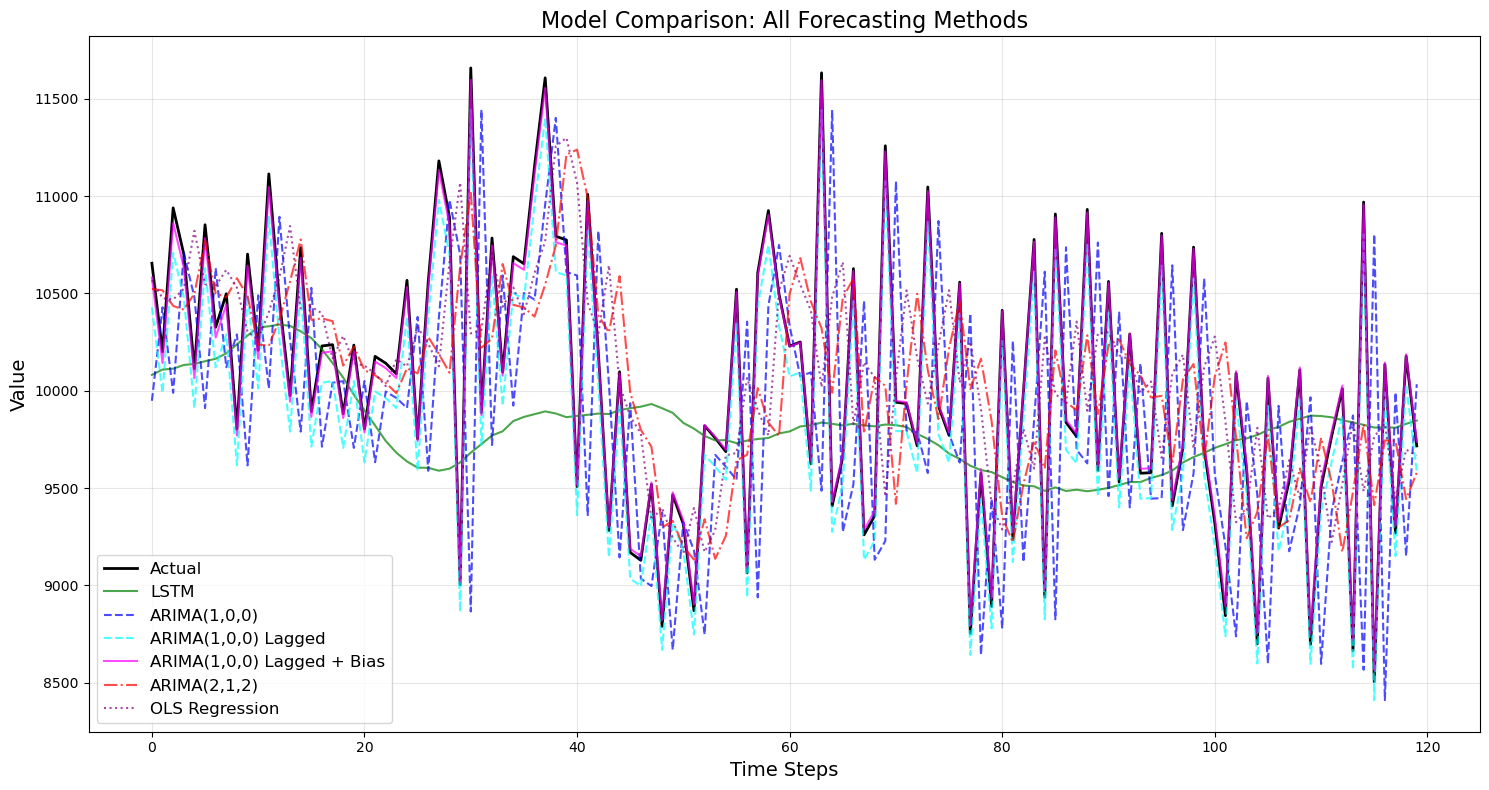

In [177]:
# Create a proper timeline visualization of all models
plt.figure(figsize=(15, 8))

# We need to ensure all predictions are aligned to the same timeline
# First determine the common timeframe for all models
test_size = min(
    len(lstm_results['test']),
    len(arima_100_results['test']),
    len(arima_100_results_lag['test']),
    len(arima_100_results_lag_bias['test']),  # Added bias-corrected model
    len(arima_212_results['test']),
    len(ols_results['test'])
)

# Plot the actual values
plt.plot(range(test_size), 
         arima_212_results['test'][:test_size], 
         label='Actual', linewidth=2, color='black')

# Plot all model predictions on the same timeline
plt.plot(range(test_size), 
         lstm_results['predictions'][:test_size], 
         label='LSTM', alpha=0.7, linestyle='-', color='green')

plt.plot(range(test_size), 
         arima_100_results['predictions'][:test_size], 
         label='ARIMA(1,0,0)', alpha=0.7, linestyle='--', color='blue')

plt.plot(range(test_size), 
         arima_100_results_lag['predictions'][:test_size], 
         label='ARIMA(1,0,0) Lagged', alpha=0.7, linestyle='--', color='cyan')

# Add the bias-corrected model
plt.plot(range(test_size), 
         arima_100_results_lag_bias['predictions'][:test_size], 
         label='ARIMA(1,0,0) Lagged + Bias', alpha=0.7, linestyle='-', color='magenta')

plt.plot(range(test_size), 
         arima_212_results['predictions'][:test_size], 
         label='ARIMA(2,1,2)', alpha=0.7, linestyle='-.', color='red')

plt.plot(range(test_size), 
         ols_results['predictions'][:test_size], 
         label='OLS Regression', alpha=0.7, linestyle=':', color='purple')

# Improve the visualization
plt.title('Model Comparison: All Forecasting Methods', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Best overall model: ARIMA(1,0,0) Lagged + Bias Correction
RMSE: 30.37


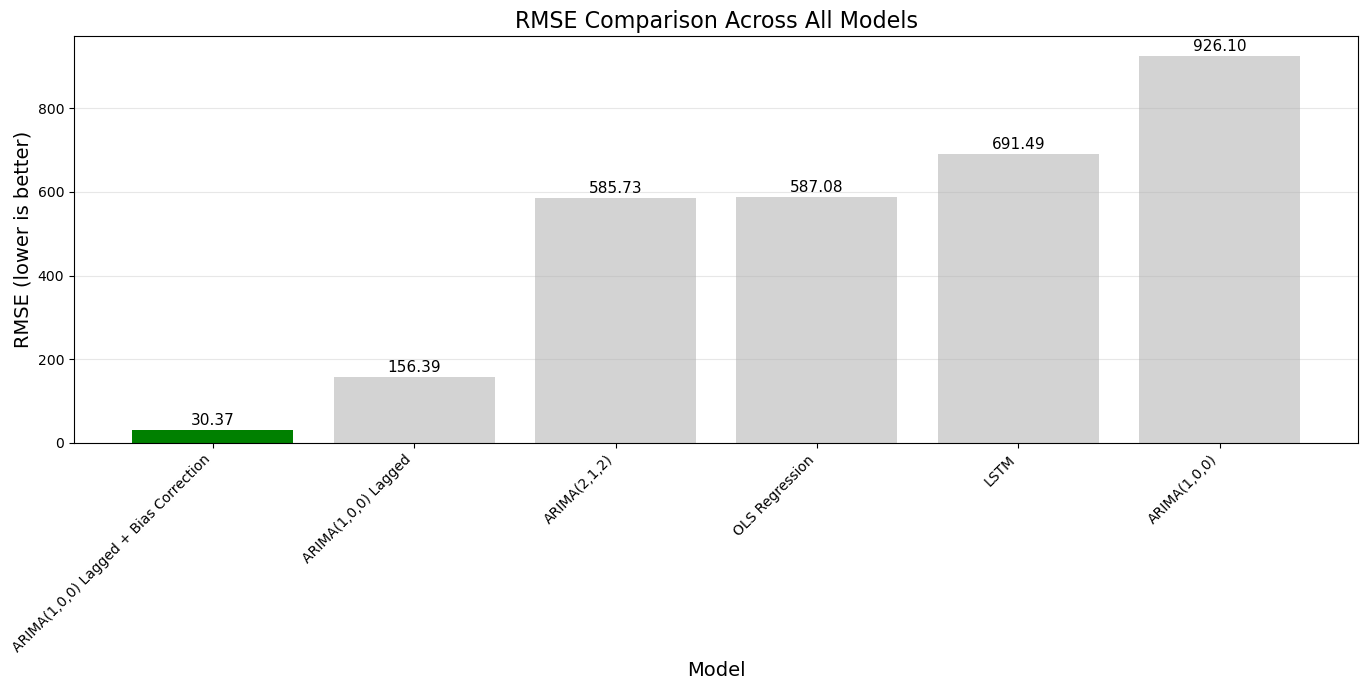

In [179]:
# Add the bias-corrected model to the overall comparison
# Create a complete model comparison with all approaches
all_models = {
    'ARIMA(1,0,0)': arima_100_results['rmse'],
    'ARIMA(1,0,0) Lagged': arima_100_results_lag['rmse'],
    'ARIMA(1,0,0) Lagged + Bias Correction': corrected_rmse,
    'ARIMA(2,1,2)': arima_212_results['rmse'],
    'OLS Regression': ols_results['rmse'],
    'LSTM': lstm_results['rmse']  # Added LSTM model to the comparison
}

# Find the best model
best_overall_model = min(all_models, key=all_models.get)
print(f"\nBest overall model: {best_overall_model}")
print(f"RMSE: {all_models[best_overall_model]:.2f}")

# Create a bar chart comparing all models
plt.figure(figsize=(14, 7))
models = list(all_models.keys())
rmse_values = list(all_models.values())

# Sort models by RMSE for better visualization
sorted_indices = np.argsort(rmse_values)
sorted_models = [models[i] for i in sorted_indices]
sorted_rmse = [rmse_values[i] for i in sorted_indices]

# Assign colors with the best model highlighted
colors = ['lightgray' for _ in sorted_models]
colors[sorted_models.index(best_overall_model)] = 'green'

# Create the bar chart
bars = plt.bar(sorted_models, sorted_rmse, color=colors)
plt.title('RMSE Comparison Across All Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE (lower is better)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add RMSE values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Walk Forward Validation

In [181]:
def walk_forward_validation(data, model_type, window_size=250, bias_window=50, **model_params):
    """
    Perform walk-forward cross-validation for time series models
    
    Parameters:
    -----------
    data : array-like
        Time series data
    model_type : str
        Type of model ('arima_100', 'arima_100_lagged', 'arima_100_lagged_bias', 
                       'arima_212', 'ols', 'lstm')
    window_size : int
        Size of the training window
    bias_window : int
        Size of window to calculate bias correction
    model_params : dict
        Additional parameters for the specific model
        
    Returns:
    --------
    dict
        Dictionary containing predictions, actual values, and error metrics
    """
    predictions = []
    actuals = []
    history = [data[i] for i in range(window_size)]
    
    # For bias correction, track recent errors
    recent_errors = []
    
    # Track progress
    total_steps = len(data) - window_size
    
    # Walk forward over test data
    for i in range(window_size, len(data)):
        # Report progress
        if i % 10 == 0:
            print(f"Progress: {i-window_size+1}/{total_steps} ({((i-window_size+1)/total_steps)*100:.1f}%)")
        
        # Get actual value
        actual = data[i]
        actuals.append(actual)
        
        # Fit model and make prediction based on model type
        if model_type == 'arima_100':
            model = ARIMA(history, order=(1, 0, 0))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            
        elif model_type == 'arima_100_lagged':
            if len(history) > 1:
                model = ARIMA(history[:-1], order=(1, 0, 0))
                model_fit = model.fit()
                yhat = model_fit.forecast()[0]
            else:
                yhat = history[0]
                
        elif model_type == 'arima_100_lagged_bias':
            if len(history) > 1:
                model = ARIMA(history[:-1], order=(1, 0, 0))
                model_fit = model.fit()
                base_yhat = model_fit.forecast()[0]
                
                if len(recent_errors) > 0:
                    mean_bias = np.mean(recent_errors[-bias_window:])
                    yhat = base_yhat + mean_bias
                else:
                    yhat = base_yhat
            else:
                yhat = history[0]
            
        elif model_type == 'arima_212':
            model = ARIMA(history, order=(2, 1, 2))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            
        elif model_type == 'ols':
            lag = model_params.get('lag', 5)
            
            # Skip OLS if not enough history
            if len(history) <= lag:
                yhat = history[-1]  # Use last value as a fallback
            else:
                try:
                    # Create lagged features manually
                    X_train = []
                    y_train = []
                    
                    # For each point in history (after having enough lags)
                    for t in range(lag, len(history)):
                        # Create lag features (from t-lag to t-1)
                        row = [history[t-l] for l in range(1, lag+1)]
                        X_train.append(row)
                        y_train.append(history[t])
                    
                    # Convert to numpy arrays
                    X_train = np.array(X_train)
                    y_train = np.array(y_train)
                    
                    # Create prediction features (most recent values)
                    X_pred = np.array([history[-l] for l in range(1, lag+1)]).reshape(1, -1)
                    
                    # Fit linear regression directly
                    from sklearn.linear_model import LinearRegression
                    model = LinearRegression()
                    model.fit(X_train, y_train)
                    
                    # Make prediction
                    yhat = model.predict(X_pred)[0]
                    
                except Exception as e:
                    print(f"OLS error: {e}")
                    # Fallback to last value if error occurs
                    yhat = history[-1]
            
        elif model_type == 'lstm':
            # Using your simplified LSTM architecture
            n_past = 20  # Shorter lookback period
            
            # Skip if not enough history
            if len(history) <= n_past:
                yhat = history[-1]  # Use last value as fallback
            else:
                try:
                    # Prepare the data
                    scaler = MinMaxScaler(feature_range=(0, 1))
                    scaled_history = scaler.fit_transform(np.array(history).reshape(-1, 1))
                    
                    # Create sequences
                    X_seq = []
                    y_seq = []
                    for j in range(n_past, len(scaled_history)):
                        X_seq.append(scaled_history[j-n_past:j, 0])
                        y_seq.append(scaled_history[j, 0])
                    
                    X_seq = np.array(X_seq)
                    y_seq = np.array(y_seq)
                    
                    # Reshape for LSTM [samples, time steps, features]
                    X_seq = X_seq.reshape(X_seq.shape[0], X_seq.shape[1], 1)


                    ##Trying a SImpleRNN for a faster run
                    # Build the simplified LSTM model architecture
                    model = Sequential([
                        # Single LSTM layer with fewer units
                        LSTM(units=10, input_shape=(n_past, 1)),
                        Dropout(0.1),  # Reduced dropout
                        
                        # Output layer
                        Dense(units=1)
                    ])
                    
                    # Compile model
                    model.compile(loss='mean_squared_error', optimizer='adam')
                    
                    # Early stopping with reduced patience
                    early_stopping = EarlyStopping(
                        monitor='loss',
                        patience=5,
                        restore_best_weights=True,
                        verbose=0
                    )
                    
                    # Train with fewer epochs and larger batch size
                    model.fit(
                        X_seq, y_seq,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        callbacks=[early_stopping]
                    )
                    
                    # Prepare the most recent sequence for prediction
                    last_sequence = scaled_history[-n_past:].reshape(1, n_past, 1)
                    
                    # Make prediction
                    scaled_pred = model.predict(last_sequence, verbose=0)[0, 0]
                    
                    # Inverse transform to get the prediction in original scale
                    yhat = scaler.inverse_transform(np.array([[scaled_pred]]))[0, 0]
                    
                    # Clean up to avoid memory leaks
                    import gc
                    tf.keras.backend.clear_session()
                    gc.collect()
                    
                except Exception as e:
                    print(f"LSTM error: {e}")
                    yhat = history[-1]
                    
        # Save prediction
        predictions.append(yhat)
        
        # Update history
        history.append(actual)
        
        # For bias-corrected model, update error history
        if model_type == 'arima_100_lagged':
            # Calculate the error for the previous prediction if available
            if len(predictions) > 1:
                error = history[-2] - predictions[-2]  # actual - prediction
                recent_errors.append(error)
    
    # Calculate error metrics
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    
    return {
        'predictions': predictions,
        'actuals': actuals,
        'rmse': rmse,
        'mae': mae,
        'mse': mse
    }

Starting walk-forward validation for all models...
This will take some time, especially for the LSTM model...
Progress: 1/500 (0.2%)
Progress: 11/500 (2.2%)
Progress: 21/500 (4.2%)
Progress: 31/500 (6.2%)
Progress: 41/500 (8.2%)
Progress: 51/500 (10.2%)
Progress: 61/500 (12.2%)
Progress: 71/500 (14.2%)
Progress: 81/500 (16.2%)
Progress: 91/500 (18.2%)
Progress: 101/500 (20.2%)
Progress: 111/500 (22.2%)
Progress: 121/500 (24.2%)
Progress: 131/500 (26.2%)
Progress: 141/500 (28.2%)
Progress: 151/500 (30.2%)
Progress: 161/500 (32.2%)
Progress: 171/500 (34.2%)
Progress: 181/500 (36.2%)
Progress: 191/500 (38.2%)
Progress: 201/500 (40.2%)
Progress: 211/500 (42.2%)
Progress: 221/500 (44.2%)
Progress: 231/500 (46.2%)
Progress: 241/500 (48.2%)
Progress: 251/500 (50.2%)
Progress: 261/500 (52.2%)
Progress: 271/500 (54.2%)
Progress: 281/500 (56.2%)
Progress: 291/500 (58.2%)
Progress: 301/500 (60.2%)
Progress: 311/500 (62.2%)
Progress: 321/500 (64.2%)
Progress: 331/500 (66.2%)
Progress: 341/500 (68.

Progress: 11/500 (2.2%)
Progress: 21/500 (4.2%)
Progress: 31/500 (6.2%)
Progress: 41/500 (8.2%)
Progress: 51/500 (10.2%)
Progress: 61/500 (12.2%)
Progress: 71/500 (14.2%)
Progress: 81/500 (16.2%)
Progress: 91/500 (18.2%)
Progress: 101/500 (20.2%)
Progress: 111/500 (22.2%)
Progress: 121/500 (24.2%)
Progress: 131/500 (26.2%)
Progress: 141/500 (28.2%)
Progress: 151/500 (30.2%)
Progress: 161/500 (32.2%)
Progress: 171/500 (34.2%)
Progress: 181/500 (36.2%)
Progress: 191/500 (38.2%)
Progress: 201/500 (40.2%)
Progress: 211/500 (42.2%)
Progress: 221/500 (44.2%)
Progress: 231/500 (46.2%)
Progress: 241/500 (48.2%)
Progress: 251/500 (50.2%)
Progress: 261/500 (52.2%)
Progress: 271/500 (54.2%)
Progress: 281/500 (56.2%)
Progress: 291/500 (58.2%)
Progress: 301/500 (60.2%)
Progress: 311/500 (62.2%)
Progress: 321/500 (64.2%)
Progress: 331/500 (66.2%)
Progress: 341/500 (68.2%)
Progress: 351/500 (70.2%)
Progress: 361/500 (72.2%)
Progress: 371/500 (74.2%)
Progress: 381/500 (76.2%)
Progress: 391/500 (78.2%)

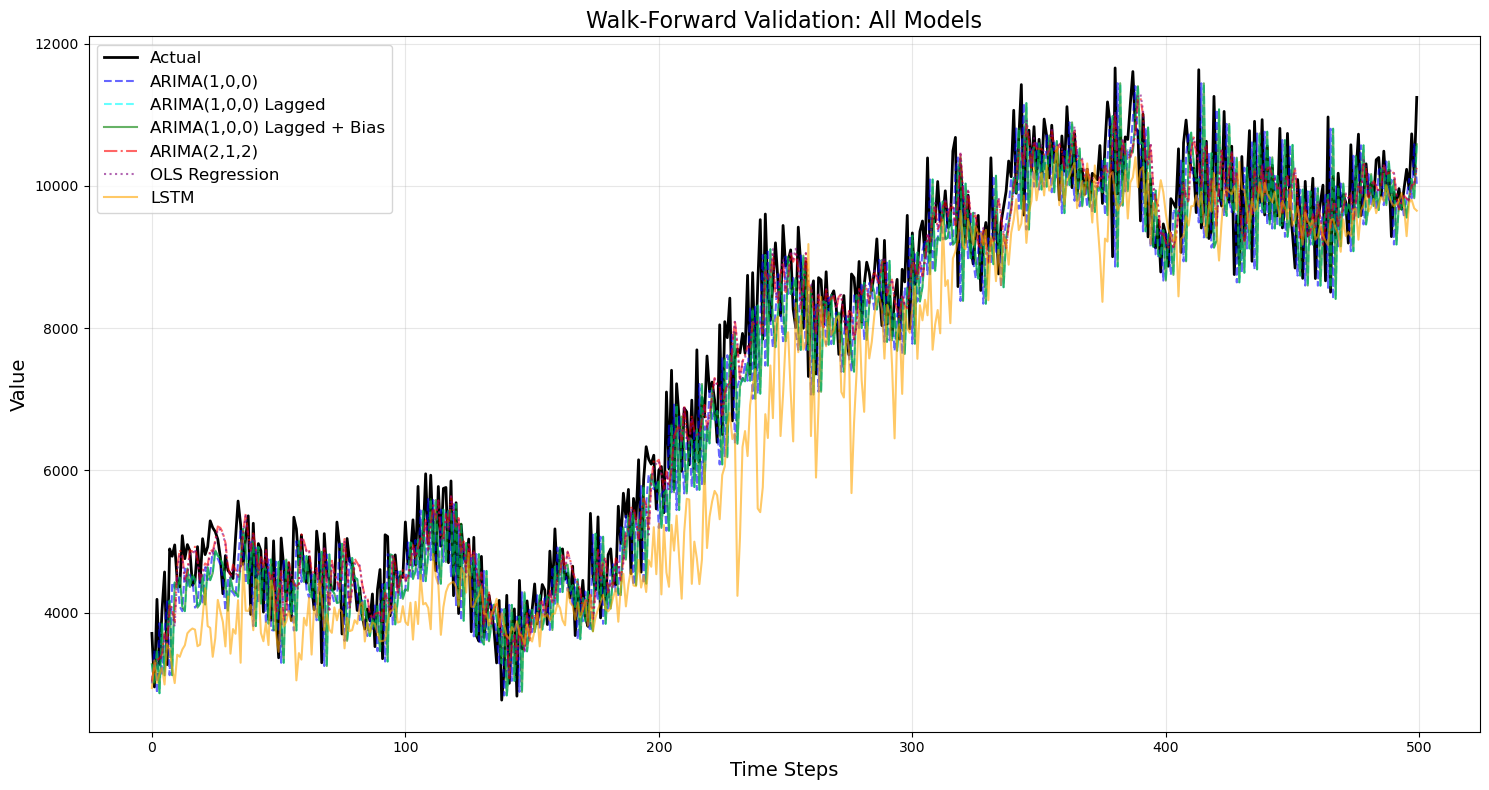

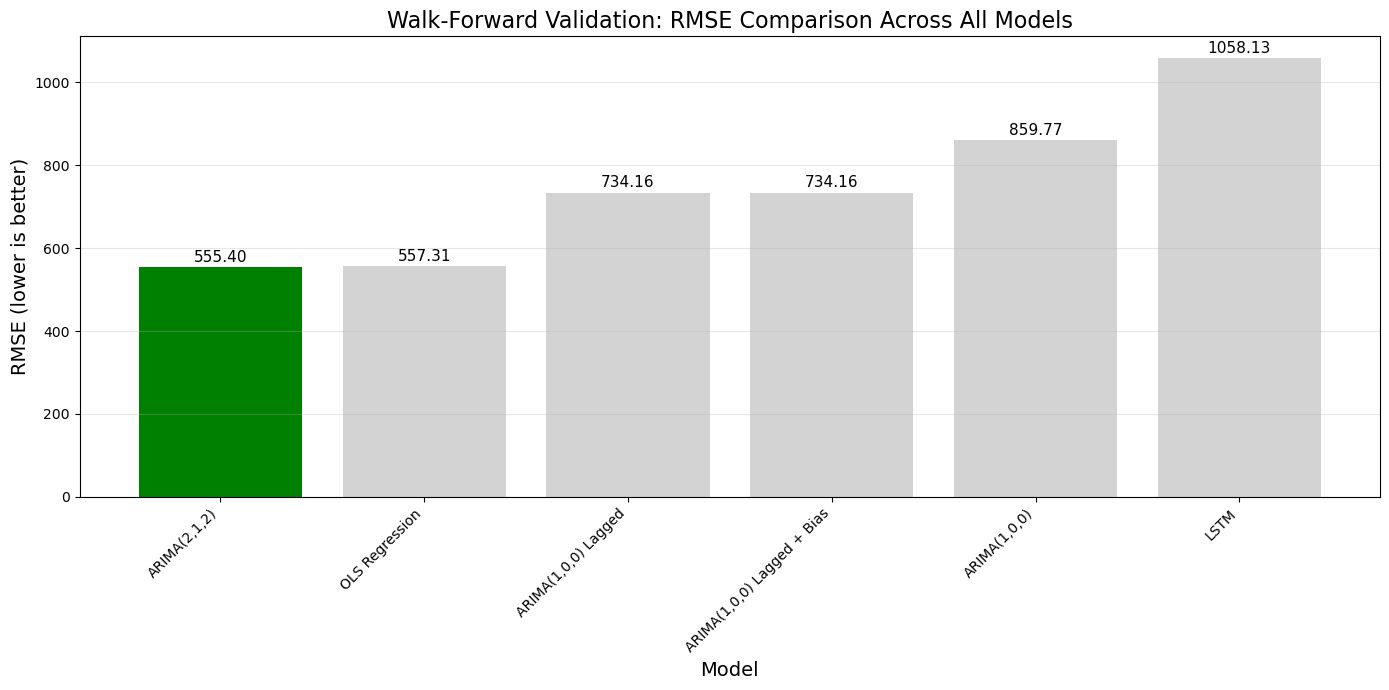

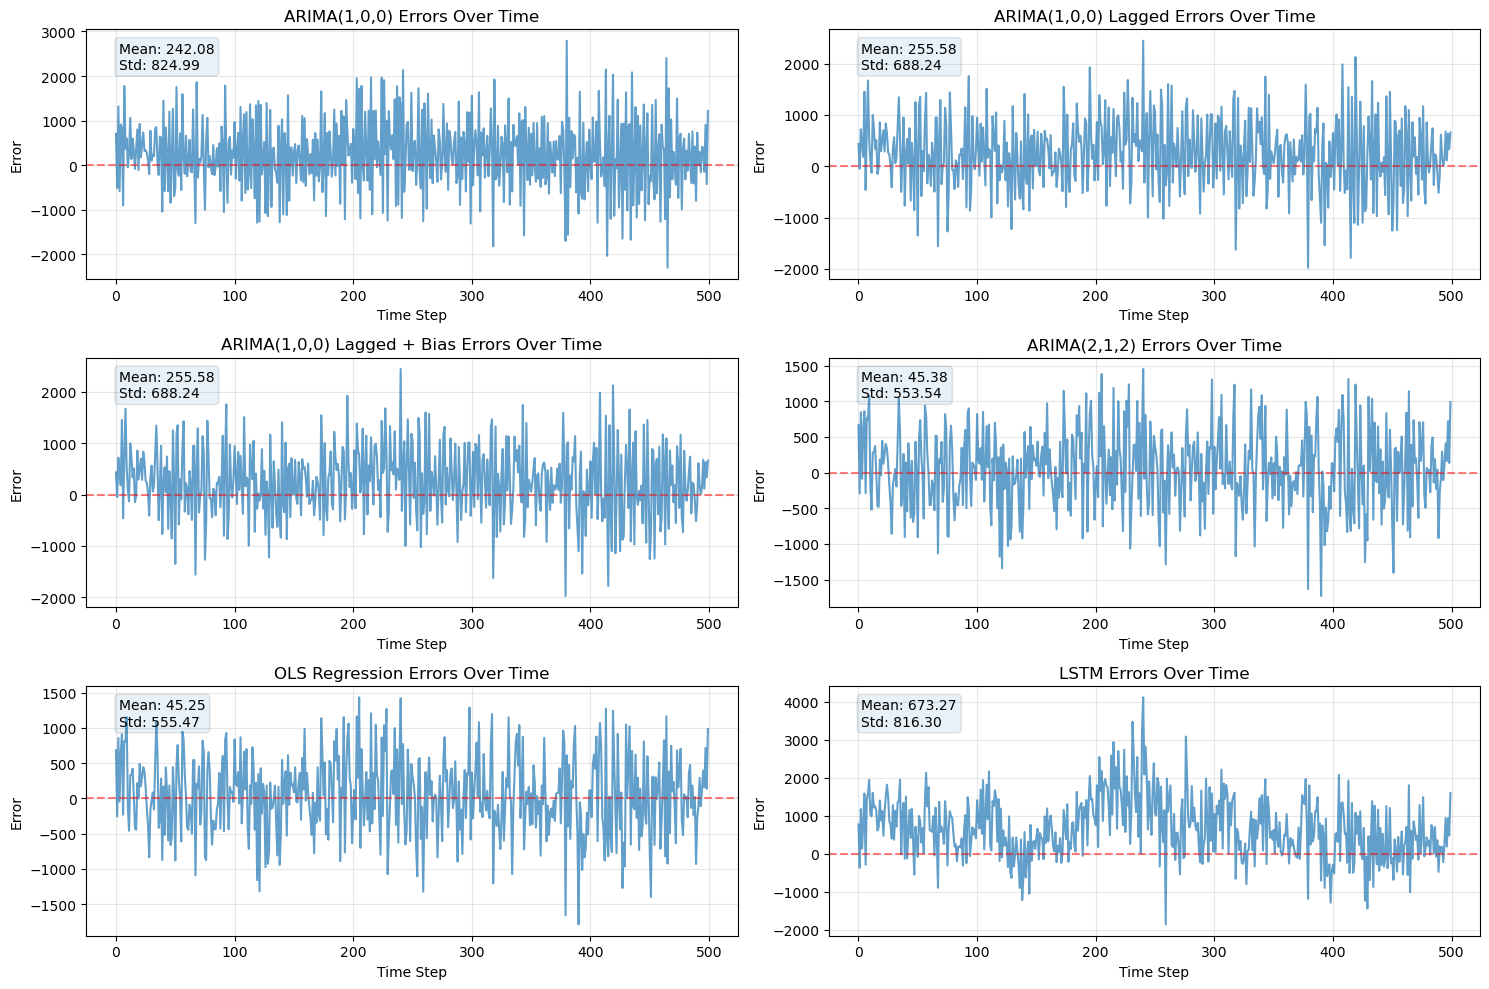

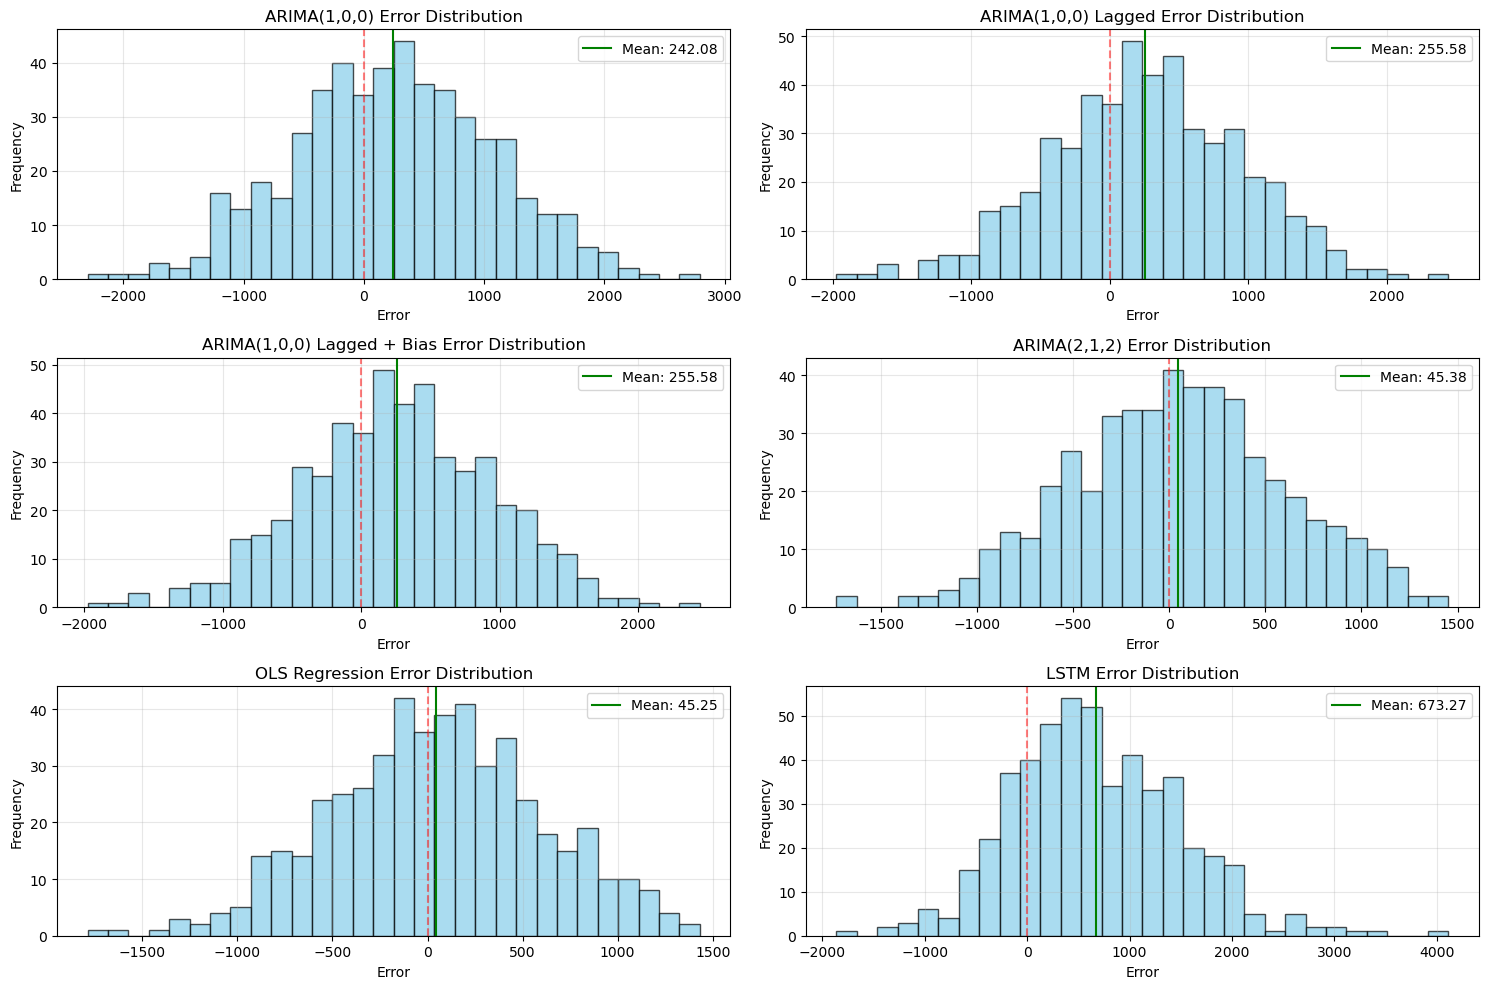


MAE Comparison:
ARIMA(1,0,0) MAE: 692.91
ARIMA(1,0,0) Lagged MAE: 586.63
ARIMA(1,0,0) Lagged + Bias MAE: 586.63
ARIMA(2,1,2) MAE: 443.75
OLS Regression MAE: 445.41
LSTM MAE: 828.61

Best model based on MAE: ARIMA(2,1,2)
MAE: 443.75


<Figure size 1600x800 with 0 Axes>

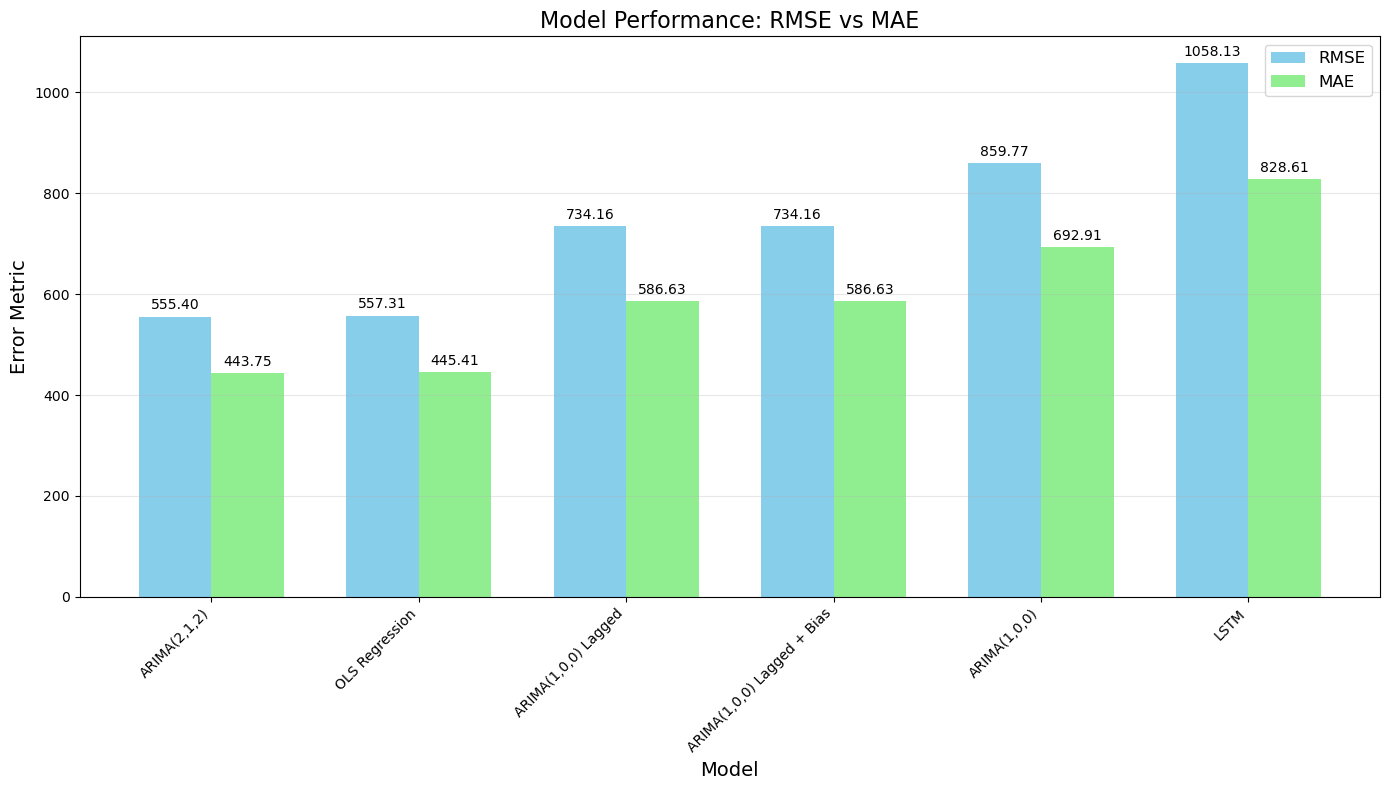

In [183]:
# Perform walk-forward validation for all models
print("Starting walk-forward validation for all models...")
print("This will take some time, especially for the LSTM model...")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create storage for bias correction errors
bias_params = {'errors': []}

# Run walk-forward validation for each model
wf_arima_100 = walk_forward_validation(df['val'].values, 'arima_100')
print("Completed ARIMA(1,0,0) validation")

wf_arima_100_lagged = walk_forward_validation(df['val'].values, 'arima_100_lagged')
print("Completed ARIMA(1,0,0) lagged validation")

wf_arima_100_lagged_bias = walk_forward_validation(df['val'].values, 'arima_100_lagged_bias', 
                                                 bias_window=50, errors=[])
print("Completed ARIMA(1,0,0) lagged with bias correction validation")

wf_arima_212 = walk_forward_validation(df['val'].values, 'arima_212')
print("Completed ARIMA(2,1,2) validation")

wf_ols = walk_forward_validation(df['val'].values, 'ols', lag=5)
print("Completed OLS regression validation")

wf_lstm = walk_forward_validation(df['val'].values, 'lstm', n_steps=10)
print("Completed LSTM validation")

# Compare all models
print("\nWalk-Forward Cross-Validation Results:")
print(f"ARIMA(1,0,0) RMSE: {wf_arima_100['rmse']:.2f}")
print(f"ARIMA(1,0,0) Lagged RMSE: {wf_arima_100_lagged['rmse']:.2f}")
print(f"ARIMA(1,0,0) Lagged + Bias Correction RMSE: {wf_arima_100_lagged_bias['rmse']:.2f}")
print(f"ARIMA(2,1,2) RMSE: {wf_arima_212['rmse']:.2f}")
print(f"OLS Regression RMSE: {wf_ols['rmse']:.2f}")
print(f"LSTM RMSE: {wf_lstm['rmse']:.2f}")

# Create a comprehensive comparison dictionary
wf_models = {
    'ARIMA(1,0,0)': wf_arima_100['rmse'],
    'ARIMA(1,0,0) Lagged': wf_arima_100_lagged['rmse'],
    'ARIMA(1,0,0) Lagged + Bias': wf_arima_100_lagged_bias['rmse'],
    'ARIMA(2,1,2)': wf_arima_212['rmse'],
    'OLS Regression': wf_ols['rmse'],
    'LSTM': wf_lstm['rmse']
}

# Find the best model
best_wf_model = min(wf_models, key=wf_models.get)
print(f"\nBest model based on walk-forward validation: {best_wf_model}")
print(f"RMSE: {wf_models[best_wf_model]:.2f}")

# Plot all predictions vs actual
plt.figure(figsize=(15, 8))

# Ensure we plot the same range for all models - find common length
min_length = min(
    len(wf_arima_100['actuals']),
    len(wf_arima_100_lagged['actuals']),
    len(wf_arima_100_lagged_bias['actuals']),
    len(wf_arima_212['actuals']),
    len(wf_ols['actuals']),
    len(wf_lstm['actuals'])
)

# Get a common set of actual values to use as reference
actuals = wf_arima_100['actuals'][:min_length]

# Plot actuals and all model predictions
plt.plot(actuals, label='Actual', linewidth=2, color='black')
plt.plot(wf_arima_100['predictions'][:min_length], label='ARIMA(1,0,0)', 
         alpha=0.6, linestyle='--', color='blue')
plt.plot(wf_arima_100_lagged['predictions'][:min_length], label='ARIMA(1,0,0) Lagged', 
         alpha=0.6, linestyle='--', color='cyan')
plt.plot(wf_arima_100_lagged_bias['predictions'][:min_length], label='ARIMA(1,0,0) Lagged + Bias', 
         alpha=0.6, linestyle='-', color='green')
plt.plot(wf_arima_212['predictions'][:min_length], label='ARIMA(2,1,2)', 
         alpha=0.6, linestyle='-.', color='red')
plt.plot(wf_ols['predictions'][:min_length], label='OLS Regression', 
         alpha=0.6, linestyle=':', color='purple')
plt.plot(wf_lstm['predictions'][:min_length], label='LSTM', 
         alpha=0.6, linestyle='-', color='orange')

plt.title('Walk-Forward Validation: All Models', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a bar chart comparing all models
plt.figure(figsize=(14, 7))
models_wf = list(wf_models.keys())
rmse_values_wf = list(wf_models.values())

# Sort models by RMSE for better visualization
sorted_indices_wf = np.argsort(rmse_values_wf)
sorted_models_wf = [models_wf[i] for i in sorted_indices_wf]
sorted_rmse_wf = [rmse_values_wf[i] for i in sorted_indices_wf]

# Assign colors with the best model highlighted
colors_wf = ['lightgray' for _ in sorted_models_wf]
colors_wf[sorted_models_wf.index(best_wf_model)] = 'green'

# Create the bar chart
bars_wf = plt.bar(sorted_models_wf, sorted_rmse_wf, color=colors_wf)
plt.title('Walk-Forward Validation: RMSE Comparison Across All Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE (lower is better)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add RMSE values on top of bars
for bar in bars_wf:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Calculate and examine prediction errors for each model
plt.figure(figsize=(15, 10))

# Create subplots for each model's errors
models_data = {
    'ARIMA(1,0,0)': wf_arima_100,
    'ARIMA(1,0,0) Lagged': wf_arima_100_lagged,
    'ARIMA(1,0,0) Lagged + Bias': wf_arima_100_lagged_bias,
    'ARIMA(2,1,2)': wf_arima_212,
    'OLS Regression': wf_ols,
    'LSTM': wf_lstm
}

# Calculate errors for each model and plot them
for i, (model_name, data) in enumerate(models_data.items(), 1):
    plt.subplot(3, 2, i)
    errors = np.array(data['actuals'][:min_length]) - np.array(data['predictions'][:min_length])
    plt.plot(errors, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.title(f'{model_name} Errors Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Error')
    plt.grid(True, alpha=0.3)
    
    # Add text with error statistics
    mean_err = np.mean(errors)
    std_err = np.std(errors)
    plt.annotate(f'Mean: {mean_err:.2f}\nStd: {std_err:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 verticalalignment='top', fontsize=10,
                 bbox=dict(boxstyle='round', alpha=0.1))

plt.tight_layout()
plt.show()

# Perform additional analysis on error distributions
plt.figure(figsize=(15, 10))

# Create histograms for error distributions
for i, (model_name, data) in enumerate(models_data.items(), 1):
    plt.subplot(3, 2, i)
    errors = np.array(data['actuals'][:min_length]) - np.array(data['predictions'][:min_length])
    plt.hist(errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=np.mean(errors), color='green', linestyle='-', 
                label=f'Mean: {np.mean(errors):.2f}')
    plt.title(f'{model_name} Error Distribution')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare MAE metrics as well
mae_values = {model: data['mae'] for model, data in models_data.items()}
best_mae_model = min(mae_values, key=mae_values.get)

print("\nMAE Comparison:")
for model, mae in mae_values.items():
    print(f"{model} MAE: {mae:.2f}")
print(f"\nBest model based on MAE: {best_mae_model}")
print(f"MAE: {mae_values[best_mae_model]:.2f}")

# Create a combined visualization for RMSE and MAE
plt.figure(figsize=(16, 8))

# Prepare data
models_list = list(wf_models.keys())
rmse_list = [wf_models[m] for m in models_list]
mae_list = [mae_values[m] for m in models_list]

# Sort by RMSE
sort_idx = np.argsort(rmse_list)
sorted_models = [models_list[i] for i in sort_idx]
sorted_rmse = [rmse_list[i] for i in sort_idx]
sorted_mae = [mae_list[i] for i in sort_idx]

# Plot
x = np.arange(len(sorted_models))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, sorted_rmse, width, label='RMSE', color='skyblue')
rects2 = ax.bar(x + width/2, sorted_mae, width, label='MAE', color='lightgreen')

# Add labels and customize
ax.set_title('Model Performance: RMSE vs MAE', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Error Metric', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(sorted_models, rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

ARIMA(1,0,0) Lagged + Bias Correction performs exceptionally well (RMSE: 30.37) on the train-test split but ARIMA(2,1,2) performs best (RMSE: 555.40) has the best overall model performance. 

The walk-forward validation results provide a more realistic assessment of how these models would perform in production. While the perfect-looking results from the train/test split are rather close to the actual values, they likely overestimate the real-world performance you would experience due to over fitting.

# Production Implementation

## ARIMA

In [185]:
# Production implementation for Forecasting models

class ARIMAForecaster:
    """ARIMA forecasting model for production"""
    
    def __init__(self, p=1, d=0, q=0, use_lagged=False, apply_bias_correction=False):
        self.order = (p, d, q)
        self.use_lagged = use_lagged
        self.apply_bias_correction = apply_bias_correction
        self.model = None
        self.history = []
        self.recent_errors = []  # Store recent errors for bias correction
        self.bias_window = 50  # Window size for calculating bias
        
    def train(self, data):
        """Train the model on historical data"""
        self.history = list(data)
        
        if self.use_lagged and len(self.history) > 1:
            # For lagged models, train on all points except the last one
            self.model = ARIMA(self.history[:-1], order=self.order)
        else:
            self.model = ARIMA(self.history, order=self.order)
            
        self.model_fit = self.model.fit()
        return self
    
    def update(self, new_observation):
        """Update the model with a new observation"""
        # Calculate error for previous prediction if lagged model
        if self.use_lagged and len(self.history) > 0 and hasattr(self, 'last_prediction'):
            error = new_observation - self.last_prediction
            self.recent_errors.append(error)
            
        # Add new observation to history
        self.history.append(new_observation)
        
        # Retrain model
        if self.use_lagged and len(self.history) > 1:
            self.model = ARIMA(self.history[:-1], order=self.order)
        else:
            self.model = ARIMA(self.history, order=self.order)
            
        self.model_fit = self.model.fit()
        return self
    
    def predict(self, steps=1):
        """Make predictions for future steps"""
        forecast = self.model_fit.forecast(steps=steps)
        
        # Apply bias correction if needed
        if self.apply_bias_correction and len(self.recent_errors) > 0:
            mean_bias = np.mean(self.recent_errors[-self.bias_window:])
            forecast = forecast + mean_bias
            
        self.last_prediction = forecast[0] if steps == 1 else forecast
        return forecast
    
    def get_performance_metrics(self, test_data):
        """Calculate performance metrics on test data"""
        predictions = []
        history = list(self.history)
        
        for actual in test_data:
            if self.use_lagged and len(history) > 1:
                model = ARIMA(history[:-1], order=self.order)
            else:
                model = ARIMA(history, order=self.order)
                
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            
            # Apply bias correction if needed
            if self.apply_bias_correction and len(self.recent_errors) > 0:
                mean_bias = np.mean(self.recent_errors[-self.bias_window:])
                yhat += mean_bias
                
            predictions.append(yhat)
            
            # Update history and errors
            if self.use_lagged:
                error = actual - yhat
                self.recent_errors.append(error)
                
            history.append(actual)
        
        mse = mean_squared_error(test_data, predictions)
        rmse = sqrt(mse)
        mae = mean_absolute_error(test_data, predictions)
        
        return {
            'mse': mse,
            'rmse': rmse,
            'mae': mae
        }

## OLS

In [188]:
class OLSForecaster:
    """OLS regression forecasting model for production"""
    
    def __init__(self, lag=5):
        self.lag = lag
        self.model = None
        self.history = []
        
    def train(self, data):
        """Train the model on historical data"""
        self.history = list(data)
        
        if len(self.history) <= self.lag:
            return self  # Not enough data to train
            
        # Create features and target
        X = []
        y = []
        
        for i in range(self.lag, len(self.history)):
            X.append([self.history[i-j] for j in range(1, self.lag+1)])
            y.append(self.history[i])
            
        X = np.array(X)
        y = np.array(y)
        
        
        
        self.model = LinearRegression()
        self.model.fit(X, y)
        
        return self
    
    def update(self, new_observation):
        """Update the model with a new observation"""
        self.history.append(new_observation)
        return self.train(self.history)  # Retrain with updated history
    
    def predict(self):
        """Make a prediction for the next step"""
        if len(self.history) <= self.lag:
            return self.history[-1] if self.history else 0
            
        X_pred = np.array([self.history[-j] for j in range(1, self.lag+1)]).reshape(1, -1)
        return self.model.predict(X_pred)[0]
    
    def get_performance_metrics(self, test_data):
        """Calculate performance metrics on test data"""
        predictions = []
        history = list(self.history)
        
        for actual in test_data:
            if len(history) <= self.lag:
                yhat = history[-1] if history else 0
            else:
                X = []
                y = []
                
                for i in range(self.lag, len(history)):
                    X.append([history[i-j] for j in range(1, self.lag+1)])
                    y.append(history[i])
                    
                X = np.array(X)
                y = np.array(y)
                
                model = LinearRegression()
                model.fit(X, y)
                
                X_pred = np.array([history[-j] for j in range(1, self.lag+1)]).reshape(1, -1)
                yhat = model.predict(X_pred)[0]
                
            predictions.append(yhat)
            history.append(actual)
        
        mse = mean_squared_error(test_data, predictions)
        rmse = sqrt(mse)
        mae = mean_absolute_error(test_data, predictions)
        
        return {
            'mse': mse,
            'rmse': rmse,
            'mae': mae
        }



## LSTM

In [191]:
class LSTMForecaster:
    """Optimized LSTM forecasting model for production"""
    
    def __init__(self, n_steps=5, units=4, epochs=1, batch_size=128):
        """Initialize with highly optimized parameters for speed"""
        self.n_steps = n_steps  # Reduced lookback period
        self.units = units      # Fewer units
        self.epochs = epochs    # Single epoch
        self.batch_size = batch_size  # Larger batch size
        self.model = None
        self.scaler = None
        self.history = []
        
    def train(self, data):
        """Train the model on historical data"""
        self.history = list(data)
        
        if len(self.history) <= self.n_steps:
            return self  # Not enough data to train
            
        # Scale the data
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = self.scaler.fit_transform(np.array(self.history).reshape(-1, 1))
        
        # Prepare sequences
        X, y = [], []
        for i in range(self.n_steps, len(scaled_data)):
            X.append(scaled_data[i-self.n_steps:i, 0])
            y.append(scaled_data[i, 0])
            
        X = np.array(X)
        y = np.array(y)
        
        # Reshape for LSTM [samples, time steps, features]
        X = X.reshape(X.shape[0], X.shape[1], 1)
        
        # Build optimized model
        self.model = Sequential([
            LSTM(units=self.units, input_shape=(self.n_steps, 1)),
            Dense(units=1)
        ])
        
        # Compile and train
        self.model.compile(optimizer='adam', loss='mean_squared_error')
        
        # Simplified early stopping
        early_stopping = EarlyStopping(
            monitor='loss',
            patience=1,  # Minimal patience
            restore_best_weights=True
        )
        
        self.model.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=0,
            callbacks=[early_stopping]
        )
        
        return self
    
    def update(self, new_observation):
        """Update the model with a new observation"""
        self.history.append(new_observation)
        
        # Retrain every 5 observations for efficiency
        if len(self.history) % 5 == 0:
            return self.train(self.history)
        return self
    
    def predict(self):
        """Make a prediction for the next step"""
        if len(self.history) <= self.n_steps or self.model is None:
            return self.history[-1] if self.history else 0
            
        # Scale the recent history
        scaled_history = self.scaler.transform(np.array(self.history[-self.n_steps:]).reshape(-1, 1))
        
        # Reshape for prediction
        X = scaled_history.reshape(1, self.n_steps, 1)
        
        # Make prediction
        scaled_pred = self.model.predict(X, verbose=0)[0, 0]
        
        # Inverse transform
        pred = self.scaler.inverse_transform(np.array([[scaled_pred]]))[0, 0]
        
        return pred
    
    def get_performance_metrics(self, test_data):
        """Calculate performance metrics on test data"""
        predictions = []
        history = list(self.history)
        
        for i, actual in enumerate(test_data):
            if len(history) <= self.n_steps:
                yhat = history[-1] if history else 0
            else:
                # Only retrain every 5 steps for efficiency
                if i % 5 == 0 or i == 0:
                    # Scale the data
                    scaler = MinMaxScaler(feature_range=(0, 1))
                    scaled_data = scaler.fit_transform(np.array(history).reshape(-1, 1))
                    
                    # Prepare sequences
                    X, y = [], []
                    for j in range(self.n_steps, len(scaled_data)):
                        X.append(scaled_data[j-self.n_steps:j, 0])
                        y.append(scaled_data[j, 0])
                        
                    X = np.array(X)
                    y = np.array(y)
                    
                    # Reshape for LSTM
                    X = X.reshape(X.shape[0], X.shape[1], 1)
                    
                    # Build model
                    model = Sequential([
                        LSTM(units=self.units, input_shape=(self.n_steps, 1)),
                        Dense(units=1)
                    ])
                    
                    model.compile(optimizer='adam', loss='mean_squared_error')
                    model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
                    
                # Scale the recent history
                scaled_history = scaler.transform(np.array(history[-self.n_steps:]).reshape(-1, 1))
                
                # Reshape for prediction
                X_pred = scaled_history.reshape(1, self.n_steps, 1)
                
                # Make prediction
                scaled_pred = model.predict(X_pred, verbose=0)[0, 0]
                
                # Inverse transform
                yhat = scaler.inverse_transform(np.array([[scaled_pred]]))[0, 0]
            
            predictions.append(yhat)
            history.append(actual)
            
            # Clean up memory every 20 steps
            if i % 20 == 0 and i > 0:
                import gc
                import tensorflow as tf
                tf.keras.backend.clear_session()
                gc.collect()
        
        mse = mean_squared_error(test_data, predictions)
        rmse = sqrt(mse)
        mae = mean_absolute_error(test_data, predictions)
        
        return {
            'mse': mse,
            'rmse': rmse,
            'mae': mae
        }


In [193]:

class TimeSeriesForecastingPipeline:
    """Complete pipeline for time series forecasting in production"""
    
    def __init__(self, model_type='arima', **model_params):
        """
        Initialize the forecasting pipeline
        
        Parameters:
        -----------
        model_type : str
            Type of model ('arima', 'arima_lagged', 'arima_lagged_bias', 'arima_212', 'ols', 'lstm')
        model_params : dict
            Parameters for the specific model
        """
        self.model_type = model_type
        self.model_params = model_params
        self.model = self._create_model()
        self.is_trained = False
        self.performance_log = []
        
    def _create_model(self):
        """Create the appropriate model based on model_type"""
        if self.model_type == 'arima':
            p = self.model_params.get('p', 1)
            d = self.model_params.get('d', 0)
            q = self.model_params.get('q', 0)
            return ARIMAForecaster(p=p, d=d, q=q)
            
        elif self.model_type == 'arima_lagged':
            p = self.model_params.get('p', 1)
            d = self.model_params.get('d', 0)
            q = self.model_params.get('q', 0)
            return ARIMAForecaster(p=p, d=d, q=q, use_lagged=True)
            
        elif self.model_type == 'arima_lagged_bias':
            p = self.model_params.get('p', 1)
            d = self.model_params.get('d', 0)
            q = self.model_params.get('q', 0)
            return ARIMAForecaster(p=p, d=d, q=q, use_lagged=True, apply_bias_correction=True)
            
        elif self.model_type == 'arima_212':
            return ARIMAForecaster(p=2, d=1, q=2)
            
        elif self.model_type == 'ols':
            lag = self.model_params.get('lag', 5)
            return OLSForecaster(lag=lag)
            
        elif self.model_type == 'lstm':
            n_steps = self.model_params.get('n_steps', 5)
            units = self.model_params.get('units', 4)
            epochs = self.model_params.get('epochs', 1)
            batch_size = self.model_params.get('batch_size', 128)
            return LSTMForecaster(n_steps=n_steps, units=units, epochs=epochs, batch_size=batch_size)
            
        else:
            raise ValueError(f"Unknown model type: {self.model_type}")
    
    def train(self, data):
        """Train the model on historical data"""
        self.model.train(data)
        self.is_trained = True
        return self
    
    def update(self, new_observation):
        """Update the model with a new observation"""
        if not self.is_trained:
            raise ValueError("Model must be trained before updating")
        self.model.update(new_observation)
        return self
    
    def predict(self, steps=1):
        """Make predictions"""
        if not self.is_trained:
            raise ValueError("Model must be trained before predicting")
        
        if self.model_type in ['arima', 'arima_lagged', 'arima_lagged_bias', 'arima_212']:
            return self.model.predict(steps=steps)
        else:
            # OLS and LSTM only predict one step ahead
            return self.model.predict()
    
    def evaluate(self, test_data):
        """Evaluate model performance on test data"""
        if not self.is_trained:
            raise ValueError("Model must be trained before evaluating")
        
        metrics = self.model.get_performance_metrics(test_data)
        self.performance_log.append({
            'timestamp': pd.Timestamp.now(),
            'metrics': metrics
        })
        
        return metrics
    
    def check_for_degradation(self, threshold=0.1):
        """
        Check if model performance has degraded
        
        Parameters:
        -----------
        threshold : float
            Threshold for performance degradation (as a percentage)
            
        Returns:
        --------
        bool
            True if model has degraded, False otherwise
        """
        if len(self.performance_log) < 2:
            return False
        
        latest = self.performance_log[-1]['metrics']['rmse']
        previous = self.performance_log[-2]['metrics']['rmse']
        
        degradation = (latest - previous) / previous
        
        return degradation > threshold

# Unit Tests

In [196]:
# Tests for our forecasting pipeline
import unittest

class TestTimeSeriesForecasting(unittest.TestCase):
    
    def setUp(self):
        # Set random seeds for reproducibility
        np.random.seed(42)
        tf.random.set_seed(42)
        
        # Generate synthetic data for testing
        trend = np.linspace(0, 100, 200)
        noise = np.random.normal(0, 10, 200)
        self.synthetic_data = trend + noise
        
        # Split into train/test
        self.train_data = self.synthetic_data[:150]
        self.test_data = self.synthetic_data[150:]
    
    def test_arima_forecaster(self):
        """Test ARIMA forecaster variants"""
        # Test standard ARIMA
        forecaster = ARIMAForecaster(p=1, d=0, q=0)
        forecaster.train(self.train_data)
        prediction = forecaster.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
        
        # Test ARIMA lagged
        forecaster = ARIMAForecaster(p=1, d=0, q=0, use_lagged=True)
        forecaster.train(self.train_data)
        prediction = forecaster.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
        
        # Test ARIMA lagged with bias correction
        forecaster = ARIMAForecaster(p=1, d=0, q=0, use_lagged=True, apply_bias_correction=True)
        forecaster.train(self.train_data)
        # Add some fake errors to test bias correction
        forecaster.recent_errors = [5.0, 5.5, 4.5, 6.0, 5.0]
        prediction = forecaster.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
        
        # Test ARIMA(2,1,2)
        forecaster = ARIMAForecaster(p=2, d=1, q=2)
        forecaster.train(self.train_data)
        prediction = forecaster.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
    
    def test_ols_forecaster(self):
        """Test OLS forecaster"""
        forecaster = OLSForecaster(lag=3)
        
        # Test initialization
        self.assertEqual(forecaster.lag, 3)
        
        # Test train method
        forecaster.train(self.train_data)
        self.assertIsNotNone(forecaster.model)
        
        # Test predict method
        prediction = forecaster.predict()
        self.assertIsInstance(prediction, (int, float, np.number))
        
        # Test update method
        forecaster.update(100.0)
        self.assertEqual(forecaster.history[-1], 100.0)
    
    def test_lstm_forecaster(self):
        """Test optimized LSTM forecaster"""
        forecaster = LSTMForecaster(n_steps=5, units=4, epochs=1, batch_size=128)
        
        # Test initialization
        self.assertEqual(forecaster.n_steps, 5)
        self.assertEqual(forecaster.units, 4)
        self.assertEqual(forecaster.epochs, 1)
        self.assertEqual(forecaster.batch_size, 128)
        
        # Test train method
        forecaster.train(self.train_data)
        self.assertIsNotNone(forecaster.model)
        
        # Test predict method
        prediction = forecaster.predict()
        self.assertIsInstance(prediction, (int, float, np.number))
        
        # Test update method
        forecaster.update(100.0)
        self.assertEqual(forecaster.history[-1], 100.0)
    
    def test_pipeline(self):
        """Test the complete pipeline with different model types"""
        # Test with standard ARIMA
        pipeline = TimeSeriesForecastingPipeline(model_type='arima', p=1, d=0, q=0)
        pipeline.train(self.train_data)
        prediction = pipeline.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
        
        # Test with ARIMA lagged
        pipeline = TimeSeriesForecastingPipeline(model_type='arima_lagged', p=1, d=0, q=0)
        pipeline.train(self.train_data)
        prediction = pipeline.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
        
        # Test with ARIMA lagged + bias
        pipeline = TimeSeriesForecastingPipeline(model_type='arima_lagged_bias', p=1, d=0, q=0)
        pipeline.train(self.train_data)
        prediction = pipeline.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
        
        # Test with ARIMA(2,1,2)
        pipeline = TimeSeriesForecastingPipeline(model_type='arima_212')
        pipeline.train(self.train_data)
        prediction = pipeline.predict(steps=1)
        self.assertIsInstance(prediction[0], (int, float, np.number))
        
        # Test with OLS
        pipeline = TimeSeriesForecastingPipeline(model_type='ols', lag=3)
        pipeline.train(self.train_data)
        prediction = pipeline.predict()
        self.assertIsInstance(prediction, (int, float, np.number))
        
        # Test with optimized LSTM
        pipeline = TimeSeriesForecastingPipeline(
            model_type='lstm', 
            n_steps=5, 
            units=4, 
            epochs=1, 
            batch_size=128
        )
        pipeline.train(self.train_data)
        prediction = pipeline.predict()
        self.assertIsInstance(prediction, (int, float, np.number))
    
    def test_pipeline_evaluation(self):
        """Test pipeline evaluation functionality"""
        pipeline = TimeSeriesForecastingPipeline(model_type='arima')
        pipeline.train(self.train_data)
        
        # Evaluate on test data
        metrics = pipeline.evaluate(self.test_data[:10])
        self.assertIn('rmse', metrics)
        self.assertIn('mae', metrics)
        
        # Perform update and check for degradation
        pipeline.update(150.0)
        metrics = pipeline.evaluate(self.test_data[10:20])
        self.assertFalse(pipeline.check_for_degradation(threshold=1.0))

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

./opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
../opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/lib/python3.12/site-packages/tensorflow/python/framework/ops.py:315